## 1. Importing Libraries

In [1]:
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import re
import sqlite3
import pandas as pd
import numpy as np
import nltk
import sys
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from hurry.filesize import size
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from scipy import stats
from tqdm import tqdm
import os
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import gc
import warnings
warnings.filterwarnings("ignore")

## 2. Reading Data

In [2]:
#all files have been saved under this root directory
root_dir='D:/AAIC dataset/self case study 1'


## 3.1. Application Train/Test data feature engineering

In [3]:
#storing the files in dataframe for further analysis
application_test = pd.read_csv(os.path.join(root_dir,'application_test.csv'))
application_train = pd.read_csv(os.path.join(root_dir,'application_train.csv'))



## 3.2. Shape of the Datasets

In [4]:
print("Shape of application train: ",application_train.shape)
print("Shape of application test: ",application_test.shape)

Shape of application train:  (307511, 122)
Shape of application test:  (48744, 121)


We Have 121 features and dependent feature 'TARGET' in the train data that we want to predict

In [5]:
#snapshot of application train data
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [6]:
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

## 3.3. Name of all the columns

In [7]:
#name of all the columns
print("All the column names: ",application_train.columns.values)
#name of all the categorical features
print("\n\nWe have {} categorical features and name of the categorical featres: {} ".\
      format(len(application_train.select_dtypes('object').columns.values),\
             application_train.select_dtypes('object').columns.values))

All the column names:  ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG'

## 3.4. Checking for duplicate rows

In [8]:
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
print("Shape of train data: ",application_train.shape)
#dropping the id column and checking for any duplicate rows value
temp=application_train.drop('SK_ID_CURR',axis=1)
#checking for duplicate rows
duplicate=temp[temp.duplicated()]

print("No of Duplicate Rows :",len(duplicate))
 

Shape of train data:  (307511, 122)
No of Duplicate Rows : 0


<h3><u>Observation:</u></h3><br>
There are no duplicate rows, all rows are with unique SK_ID_CURR    

## 3.5. Checking for duplicate columns

In [9]:
#dropping the TARGET class label column before duplicate column value check
temp=application_train.drop('TARGET',axis=1)

In [10]:
#https://www.geeksforgeeks.org/how-to-find-drop-duplicate-columns-in-a-pandas-dataframe/
def getDuplicateColumns(data,x,y):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(data.shape[1]):
          
        # Take column at xth index.
        col = data.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, data.shape[1]):
              
            # Take column at yth index.
            otherCol = data.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(data.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [11]:
#getting the duplicate columns
getDuplicateColumns(temp,temp.shape[1],temp.shape[0])

[]

<h3><u>Observation:</u></h3><br>
There are no duplicate columns   

## 3.6.  Applying the data cleaning and preprocessing from the finding of EDA

In [12]:
def categorical_feature_preprocess(value):
    value=value.replace(':','')
    value= '_'.join(i for i in value.split() if i not in ['/','_','-']).lower()
    value=value.replace('/','_')
    return value

In [13]:
def preprocessing_feature_engineering_application(data):
    print("Shape of dataset: ",data.shape)
    #removing the value as suspected as outlier
    data[data['AMT_INCOME_TOTAL']>1e8]['AMT_INCOME_TOTAL']=np.nan
    #as per the column description
    data['AMT_REQ_CREDIT_BUREAU_SUM']=(data['AMT_REQ_CREDIT_BUREAU_HOUR'])+ \
    data[ 'AMT_REQ_CREDIT_BUREAU_DAY']+ \
    (data['AMT_REQ_CREDIT_BUREAU_WEEK'])+(data['AMT_REQ_CREDIT_BUREAU_MON'])+ \
    (data['AMT_REQ_CREDIT_BUREAU_QRT'])+(data['AMT_REQ_CREDIT_BUREAU_YEAR'])
    #dropping rest of the columns
    data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON' \
              ,'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)
    #removing the value as suspected as outlier
    data[data['AMT_REQ_CREDIT_BUREAU_SUM']>250]['AMT_REQ_CREDIT_BUREAU_SUM']=np.nan
    
    #converting the days field into year
    data['DAYS_BIRTH_YEAR']=np.abs(data['DAYS_BIRTH'])
    #removing the value as suspected as outlier
    data[data['DAYS_EMPLOYED']==365243]['DAYS_EMPLOYED']=np.nan
    data['DAYS_EMPLOYED']=np.abs(data['DAYS_EMPLOYED'])
    data['DAYS_REGISTRATION']=np.abs(data['DAYS_REGISTRATION'])
    data['DAYS_ID_PUBLISH']=np.abs(data['DAYS_ID_PUBLISH'])
    data['DAYS_LAST_PHONE_CHANGE']=np.abs(data['DAYS_LAST_PHONE_CHANGE'])
       
    
    categorical_feature_name_list=data.select_dtypes('object').columns.values
    for cat_features in categorical_feature_name_list:
        data[cat_features]=data[cat_features].apply(lambda x: categorical_feature_preprocess(str(x)) if x!=np.nan\
                                                               else 'nan')
        
        
    #removing the value as suspected as outlier
    data[data['OBS_30_CNT_SOCIAL_CIRCLE']>340]['OBS_30_CNT_SOCIAL_CIRCLE']=np.nan
    data[data['OBS_60_CNT_SOCIAL_CIRCLE']>340]['OBS_60_CNT_SOCIAL_CIRCLE']=np.nan
    
    #how much people defaulted in their social circle 
    data['DEF_30_FRAC_DEF_SOCIAL_CIRCLE']=data['DEF_30_CNT_SOCIAL_CIRCLE']/data['OBS_30_CNT_SOCIAL_CIRCLE']
    data['DEF_60_FRAC_DEF_SOCIAL_CIRCLE']=data['DEF_60_CNT_SOCIAL_CIRCLE']/data['OBS_60_CNT_SOCIAL_CIRCLE']
    
    #dropping rest of the columns
    data.drop(['DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE' \
              ,'OBS_60_CNT_SOCIAL_CIRCLE'],axis=1)
    

    #new features taken from domain knowledged and kaggle discussion kernels:
    #credit amount and annuity amount ratios
    data['CREDIT_ANNUITY_RATIO']=data['AMT_CREDIT']/data['AMT_ANNUITY']
    
    #good price affordable on income
    data['GOODS_PRICE_AFFORDABLE']=data['AMT_INCOME_TOTAL']/data['AMT_GOODS_PRICE']
    
    #work experiance to clients age
    data['EMPLOYED_AGE_RATIO']=data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
    
    #mean,max,min of these 3 scores EXT_SOURCE_X
    data['EXT_SOURCE_SCORE_MEAN']=data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
    data['EXT_SOURCE_SCORE_MIN']=data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min(axis = 1)
    data['EXT_SOURCE_SCORE_MAX']=data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max(axis = 1)
    
    
    print("\nAfter doing the feature engineering :\n")
    print("Shape: {} ".format(data.shape))
    return data
 
    

In [14]:
#after adding 10 features
preprocessed_application_train=preprocessing_feature_engineering_application(application_train)
preprocessed_application_test=preprocessing_feature_engineering_application(application_test)

Shape of dataset:  (307511, 122)

After doing the feature engineering :

Shape: (307511, 132) 
Shape of dataset:  (48744, 121)

After doing the feature engineering :

Shape: (48744, 131) 


## 3.7. Preapring the training and tesing data

In [15]:
#storing the dependent feature
y_train = preprocessed_application_train['TARGET'].values
#droppiing the dependent feature
X_train = preprocessed_application_train.drop(['TARGET'],axis=1)
X_test=preprocessed_application_test


# memory management
gc.enable()
#deleting the temporary datas
del preprocessed_application_train,preprocessed_application_test
gc.collect()

print(X_train.shape, y_train.shape)
print(X_test.shape)

(307511, 131) (307511,)
(48744, 131)


## 3.8. Finally all the feature engineering performed on the actual dataset

### 3.8.1. Predicting the missing value of 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'

In [16]:
#name of the missing columns that value will be predicted
missing_columns=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
#creating temporary dataframe to store the predicted value
temp_train = pd.DataFrame(columns = ['pred_' + name for name in missing_columns])
temp_test = pd.DataFrame(columns = ['pred_' + name for name in missing_columns])
#copying of original data
application_train_temp=X_train.copy()
application_test_temp=X_test.copy()
#for each columns 
for col in missing_columns:
    #storing the columns value to impute
    temp_train['pred_' + col] = X_train[col]
    temp_test['pred_' + col] = X_test[col]
    
    #value will be predicted on the rest of the columns
    rest_col = list(set(X_train.columns) - set(missing_columns)-set(['SK_ID_CURR','TARGET']))
    #converting the categorical features to one hot encoding to apply the model
    categorical_feature_name_list=application_train_temp.select_dtypes('object').columns.values
    #converting all the categorical columns into frequency encoding    
    for cat_features in categorical_feature_name_list:
        #calculating the frequency
        temp_dict=dict(application_train_temp.groupby(cat_features).size()/len(application_train_temp))
        #converting the features to frequency
        application_train_temp[cat_features]=application_train_temp[cat_features].apply(lambda x:temp_dict.get(x,0))
        
        application_test_temp[cat_features]=application_test_temp[cat_features].apply(lambda x:temp_dict.get(x,0))
    #light GBM regressor model to predict the missing values
    lgbmr = LGBMRegressor(max_depth = 9, n_estimators = 5000, n_jobs = -1, learning_rate = 0.3, 
                                  random_state = 125)
    #fitting on the data
    lgbmr.fit(X = application_train_temp[rest_col], y = application_train_temp[col])
    #adding predicted values in the temp train and test data
    temp_train.loc[application_train_temp[col].isnull(), 'pred_'+col] = lgbmr.predict(application_train_temp[rest_col])\
    [application_train_temp[col].isnull()]
    
    temp_test.loc[application_test_temp[col].isnull(), 'pred_'+col] = lgbmr.predict(application_test_temp[rest_col])\
    [application_test_temp[col].isnull()]
    

In [17]:
# memory management
gc.enable()
del application_train_temp,application_test_temp
gc.collect()
#adding the columns with the predicted values for train and test data
X_train[['pred_EXT_SOURCE_1','pred_EXT_SOURCE_2','pred_EXT_SOURCE_3']]=temp_train[['pred_EXT_SOURCE_1',\
                                                                                'pred_EXT_SOURCE_2','pred_EXT_SOURCE_3']]

X_test[['pred_EXT_SOURCE_1','pred_EXT_SOURCE_2','pred_EXT_SOURCE_3']]=temp_test[['pred_EXT_SOURCE_1',\
                                                                                'pred_EXT_SOURCE_2','pred_EXT_SOURCE_3']]



In [18]:
# memory management
gc.enable()
#deleting the temporary datas
del temp_train,temp_test
gc.collect()

84

In [19]:
#After adding the 3 predicted columns
print("Shape of train data:",X_train.shape)
print("Shape of cv data:",X_test.shape)


Shape of train data: (307511, 134)
Shape of cv data: (48744, 134)


### 3.8.2. Calculating category wise numerical mean

In [20]:
#this will get the mean value of numerical feature alues based on their corresponding value in the categorical features
def categorical_numerical_feature_engineering(data,numerical_feature,categorical_feature):
    #apply groupby to get the mean of numerical values for each unique value of categoical feature
    temp=data[[numerical_feature,categorical_feature]].groupby([categorical_feature]).agg(['mean']).reset_index()
    #converting it to a dictionary to get the new feature
    temp_dict=dict(np.array(temp))
    return temp_dict

In [21]:
#we are taking the top 10 features 
def calculating_category_wise_numerical_mean(train_data,test_data):
    categorical_feature_name_list=train_data.select_dtypes('object').columns.values
    top_10_numerical_feature_list=['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH',\
    'DAYS_REGISTRATION','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','AMT_INCOME_TOTAL']  
    #adding total 160 features to the main data set
    for categorical_feature in categorical_feature_name_list:
        for numerical_feature in top_10_numerical_feature_list:
            temp_dict=categorical_numerical_feature_engineering(train_data,numerical_feature,categorical_feature)
            #creating new feature name
            new_feature_name=str(numerical_feature)+'_'+str(categorical_feature)+'_mean'
            #adding the feature in the dataframe
            train_data[new_feature_name]=train_data[categorical_feature].apply(lambda x: temp_dict.get(x,0) )
            
            test_data[new_feature_name]=test_data[categorical_feature].apply(lambda x: temp_dict.get(x,0) )

In [22]:
calculating_category_wise_numerical_mean(X_train,X_test)

#after adding 16*10=160 features
print("Shape of train data:",X_train.shape)
print("Shape of test data:",X_test.shape)


Shape of train data: (307511, 294)
Shape of test data: (48744, 294)


### 3.8.3. One hot encoding of categorical variables

In [23]:
def onehot_encoding_categorical_features(train_data,test_data):
    #categorical features
    categorical_feature_name_list=train_data.select_dtypes('object').columns.values
    #converting all the categorical columns into one hot encoding   
    for cat_features in categorical_feature_name_list:
        print(cat_features)
        #creating countervectorizer for each unique value
        vectorizer = CountVectorizer(tokenizer=lambda txt: txt.split())
        #fitting on the train data
        vectorizer.fit(train_data[cat_features].apply(lambda x: np.str_(x)))
        print(vectorizer.get_feature_names())
        #applying transform on the train data
        temp_train=vectorizer.transform(train_data[cat_features].apply(lambda x: np.str_(x)))
        #convert csr to dense matrix and renaming the one hot encoded columns
        temp_train1=pd.DataFrame(temp_train.todense(),columns=[cat_features+'_'+i for i in vectorizer.get_feature_names()],\
                                index=train_data.index)
        print(temp_train1.shape,train_data.shape)
        #adding the one hot encoded feature to the main dataset
        train_data=pd.concat([train_data,temp_train1],axis=1)
        print(train_data.shape)
        #applying transform on the test data
        temp_test=vectorizer.transform(test_data[cat_features].apply(lambda x: np.str_(x)))
        #convert csr to dense matrix and renaming the one hot encoded columns
        temp_test1=pd.DataFrame(temp_test.todense(),columns=[cat_features+'_'+i for i in vectorizer.get_feature_names()],\
                                index=test_data.index)
        print(temp_test1.shape,test_data.shape)
        #adding the one hot encoded feature to the main dataset
        test_data=pd.concat([test_data,temp_test1],axis=1)
        print(test_data.shape)
        
        #dropping the original categorical features after one hot encoding them
        train_data.drop(cat_features,axis=1,inplace=True)
        
        test_data.drop(cat_features,axis=1,inplace=True)
        
        # memory management
        gc.enable()
        #deleting temporary datas
        del temp_train,temp_train1,temp_test,temp_test1
        gc.collect()

    return train_data,test_data

In [24]:
application_train_final,application_test_final=onehot_encoding_categorical_features\
(X_train,X_test)
#after one-hot encoding--added 130 columns
print("Shape of train data:",application_train_final.shape)
print("Shape of test data:",application_test_final.shape)

NAME_CONTRACT_TYPE
['cash_loans', 'revolving_loans']
(307511, 2) (307511, 294)
(307511, 296)
(48744, 2) (48744, 294)
(48744, 296)
CODE_GENDER
['f', 'm', 'xna']
(307511, 3) (307511, 295)
(307511, 298)
(48744, 3) (48744, 295)
(48744, 298)
FLAG_OWN_CAR
['n', 'y']
(307511, 2) (307511, 297)
(307511, 299)
(48744, 2) (48744, 297)
(48744, 299)
FLAG_OWN_REALTY
['n', 'y']
(307511, 2) (307511, 298)
(307511, 300)
(48744, 2) (48744, 298)
(48744, 300)
NAME_TYPE_SUITE
['children', 'family', 'group_of_people', 'nan', 'other_a', 'other_b', 'spouse,_partner', 'unaccompanied']
(307511, 8) (307511, 299)
(307511, 307)
(48744, 8) (48744, 299)
(48744, 307)
NAME_INCOME_TYPE
['businessman', 'commercial_associate', 'maternity_leave', 'pensioner', 'state_servant', 'student', 'unemployed', 'working']
(307511, 8) (307511, 306)
(307511, 314)
(48744, 8) (48744, 306)
(48744, 314)
NAME_EDUCATION_TYPE
['academic_degree', 'higher_education', 'incomplete_higher', 'lower_secondary', 'secondary_secondary_special']
(307511,

### 3.8.4. K-means clustering label 

In [26]:
#normalizing the value for applying PCA
std_scalar = StandardScaler()
#applying fit and transform on the train data
application_train_final_std=std_scalar.fit_transform(application_train_final.drop('SK_ID_CURR',axis=1))
#applying transform on the test data
application_test_final_std=std_scalar.transform(application_test_final.drop('SK_ID_CURR',axis=1))


#Applying PCA to tranform data from 135 to 5 feature to apply k-means clustering
pca = PCA(n_components=5)
#applying fit and transform on the train data
X_train_pca=pca.fit_transform(np.nan_to_num(application_train_final_std))
#applying transform on the test data
X_test_pca=pca.transform(np.nan_to_num(application_test_final_std))
#after applying PCA we have 5 features
print(X_train_pca.shape,X_test_pca.shape)

(307511, 5) (48744, 5)


In [27]:
#applying kmeans clustering
from sklearn.cluster import KMeans
algo = KMeans(n_clusters=2,random_state=15)
#fitting on the train data
algo.fit(X_train_pca)
#this will a be a new feature for train data
algo.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
#this will be new feature for test data
print(len(algo.predict(X_test_pca)))

48744


In [29]:
#applying tsne to visualize the k-menas clustering
transform = TSNE 

trans = transform(n_components=2)
X_train_2d = trans.fit_transform(X_train_pca)

In [30]:
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
#storing the tsne 2d vectors into dataframe for scatter plot
df = pd.DataFrame(X_train_2d)
#storing the cluster lables for color coding
df['cluster_label'] = algo.labels_
df.columns = ['x','y','cluster_label']

Text(0.5,1,'TSNE visualization of app cluster')

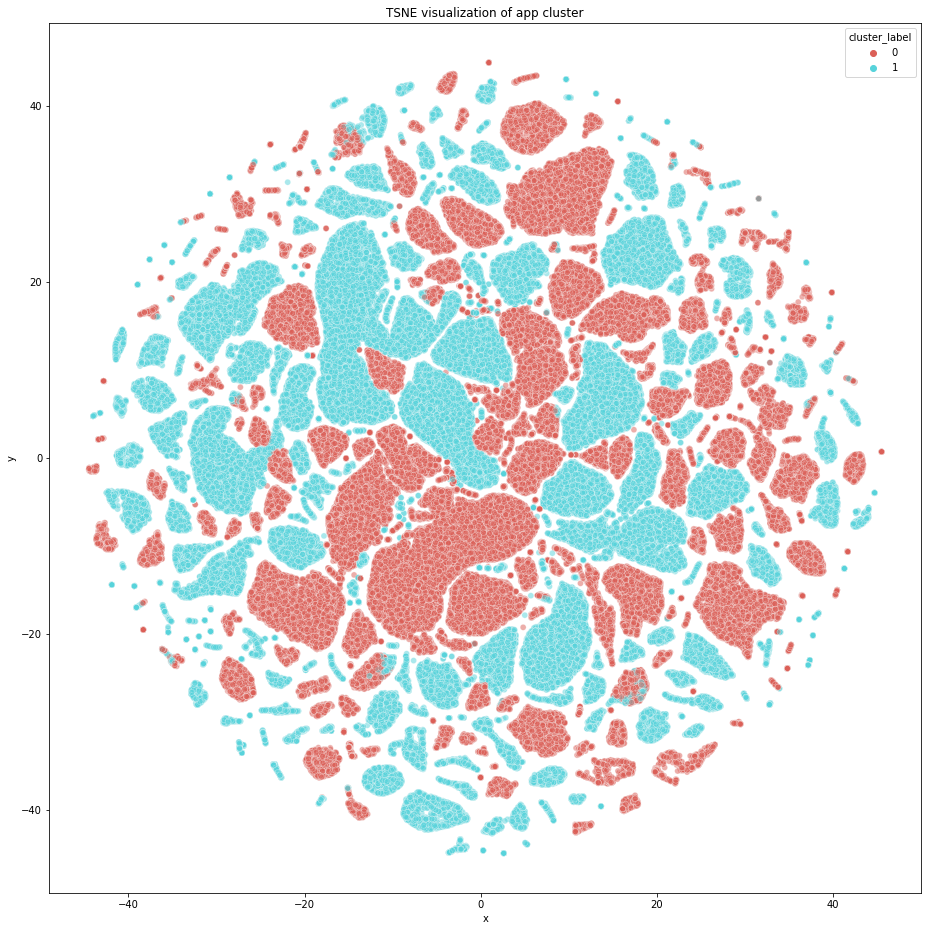

In [31]:
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
sns.scatterplot(data=df,x='x',y='y',hue='cluster_label',legend="full",alpha=0.5,palette=sns.color_palette("hls", 2))
plt.title('{} visualization of app cluster'.format(transform.__name__))

In [32]:
#adding the cluster label as a feature
application_train_final['K_MEANS_CLUSTER_LABEL']=algo.labels_
application_test_final['K_MEANS_CLUSTER_LABEL']=algo.predict(X_test_pca)


print("Shape of train data:",application_train_final.shape)
print("Shape of test data:",application_test_final.shape)


Shape of train data: (307511, 425)
Shape of test data: (48744, 425)


### 3.8.5. calculating the mean of 500 nearest neighbour's "TARGET" based on <br>'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','CREDIT_ANNUITY_RATIO'

In [33]:
def additional_feature_engineering(train_data,test_data,y_train):
    print("Shape of train data: {} ".format(train_data.shape))
    print("Shape of test data: {} ".format(test_data.shape))
    #https://www.kaggle.com/c/home-credit-default-risk/discussion/64784
    #from winner solution neighbors_target_mean_500: The mean TARGET value of the 500 closest neighbors 
    #of each row, where each neighborhood was defined by the three external sources and the credit/annuity ratio.
    #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    knn = KNeighborsClassifier(500)
    X_train_knn=train_data[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','CREDIT_ANNUITY_RATIO']].fillna(0)
    temp=train_data.copy()
    temp['TARGET']=y_train
    #fitting only on train data
    knn.fit(X_train_knn, y_train)
    #500 nearest neighbors for train
    nearest_500_neighbors_train = knn.kneighbors(X_train_knn)[1] 

    neighbors_target_mean_500_train=[]
    for i in nearest_500_neighbors_train:
        neighbors_target_mean_500_train.append(np.mean(temp['TARGET'].iloc[i]))#transform

    train_data['NEIGHBORS_TARGET_MEAN_500']=neighbors_target_mean_500_train
    
    
    X_test_knn=test_data[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','CREDIT_ANNUITY_RATIO']].fillna(0)
    #500 nearest neighbors
    nearest_500_neighbors_test = knn.kneighbors(X_test_knn)[1] 

    neighbors_target_mean_500_test=[]
    for i in nearest_500_neighbors_test:
        neighbors_target_mean_500_test.append(np.mean(temp['TARGET'].iloc[i]))#transform

    test_data['NEIGHBORS_TARGET_MEAN_500']=neighbors_target_mean_500_test
    
    
    print("After doing the feature engineering :\n\n")
    print("Shape of train data: {} ".format(train_data.shape))
    print("Shape of test data: {} ".format(test_data.shape))
    
 

In [34]:
#after calculating the mean of 500 nearest neighbour's "TARGET" based on 
# 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','CREDIT_ANNUITY_RATIO'
additional_feature_engineering(application_train_final, application_test_final,y_train)

Shape of train data: (307511, 425) 
Shape of test data: (48744, 425) 
After doing the feature engineering :


Shape of train data: (307511, 426) 
Shape of test data: (48744, 426) 


### finally we have 426 features for train and test data

In [35]:
application_train_final.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461            637   
1        1129500.0                    0.003541      -16765           1188   
2         135000.0                    0.010032      -19046            225   
3         297000.0                    0.008019      -19005           3039   
4         513000.0                    0.028663      -19932           3038   

   DAYS_REGISTRATION            ...              WALLSMATERIAL_MODE_nan  \
0             3648.0            ...                                   0   
1             1186.0            ...                                   0   
2             4260.0            ...                                   1   
3             9833.0            ...                                   1   
4             4311.0            ...                                   1   

   WALLSMATERIAL_MODE_others  WALLSMATERIAL_MODE_panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   WALLSMATERIAL_MODE_stone,_brick  WALLSMATERIAL_MODE_wooden  \
0                                1                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   EMERGENCYSTATE_MODE_nan  EMERGENCYSTATE_MODE_no  EMERGENCYSTATE_MODE_yes  \
0                        0                       1                        0   
1                        0                       1                        0   
2                        1                       0                        0   
3                        1                       0                        0   
4                        1                       0                        0   

   K_MEANS_CLUSTER_LABEL  NEIGHBORS_TARGET_MEAN_500  
0                      0                      0.278  
1                      0                      0.064  
2                      1                      0.028  
3                      1                      0.034  
4                      1                      0.108  

[5 rows x 426 columns]

In [36]:
application_test_final.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100001             0          135000.0    568800.0      20560.5   
1      100005             0           99000.0    222768.0      17370.0   
2      100013             0          202500.0    663264.0      69777.0   
3      100028             2          315000.0   1575000.0      49018.5   
4      100038             1          180000.0    625500.0      32067.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         450000.0                    0.018850      -19241           2329   
1         180000.0                    0.035792      -18064           4469   
2         630000.0                    0.019101      -20038           4458   
3        1575000.0                    0.026392      -13976           1866   
4         625500.0                    0.010032      -13040           2191   

   DAYS_REGISTRATION            ...              WALLSMATERIAL_MODE_nan  \
0             5170.0            ...                                   0   
1             9118.0            ...                                   1   
2             2175.0            ...                                   1   
3             2000.0            ...                                   0   
4             4000.0            ...                                   1   

   WALLSMATERIAL_MODE_others  WALLSMATERIAL_MODE_panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         1   
4                          0                         0   

   WALLSMATERIAL_MODE_stone,_brick  WALLSMATERIAL_MODE_wooden  \
0                                1                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   EMERGENCYSTATE_MODE_nan  EMERGENCYSTATE_MODE_no  EMERGENCYSTATE_MODE_yes  \
0                        0                       1                        0   
1                        1                       0                        0   
2                        1                       0                        0   
3                        0                       1                        0   
4                        1                       0                        0   

   K_MEANS_CLUSTER_LABEL  NEIGHBORS_TARGET_MEAN_500  
0                      0                      0.034  
1                      1                      0.112  
2                      1                      0.018  
3                      0                      0.036  
4                      1                      0.140  

[5 rows x 426 columns]

In [37]:
application_train_final.columns.values

array(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG

In [23]:
#https://towardsdatascience.com/how-to-learn-from-bigdata-files-on-low-memory-incremental-learning-d377282d38ff

def reduce_mem_usage(df):
    """ 
    iterate through all the columns of a dataframe and 
    modify the data type to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(('Memory usage of dataframe is {:.2f}' 
                     'MB').format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max <\
                  np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max <\
                   np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max <\
                   np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max <\
                   np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max <\
                   np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max <\
                   np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print(('Memory usage after optimization is: {:.2f}' 
                              'MB').format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) 
                                             / start_mem))
    
    return df

In [39]:
#applying this utility the memory consumption is reduced 70%+
application_train_final=reduce_mem_usage(application_train_final)
application_test_final=reduce_mem_usage(application_test_final)

Memory usage of dataframe is 998.28MB
Memory usage after optimization is: 228.45MB
Decreased by 77.1%
Memory usage of dataframe is 158.24MB
Memory usage after optimization is: 36.21MB
Decreased by 77.1%


## 3.9. Finally we have 426 features for train and test data

In [40]:
#storing them in .csv file for futher usage
application_train_final.to_csv(os.path.join(root_dir,'application_train_final_app_only.csv'),index=False)
application_test_final.to_csv(os.path.join(root_dir,'application_test_final_app_only.csv'),index=False)


## 4. bureau_balance Feature engineering

## 4.1. Reading the dataset

In [4]:
#storing the file in dataframe for further analysis
bureau_balance = pd.read_csv(os.path.join(root_dir,'bureau_balance.csv'))


## 4.2. Applying feature engineering 

In [5]:
#assigning a Defaulter flag as per the description 
bureau_balance['DPD_FLAG']=bureau_balance['STATUS'].apply(lambda x: 'Y' if x in ['5', '1', '4', '3','0', '2'] else x)

bureau_balance.drop('STATUS',axis=1,inplace=True)
#converting to positive
bureau_balance['MONTHS_BALANCE']=np.abs(bureau_balance['MONTHS_BALANCE'])
bureau_balance.head(10)

SK_ID_BUREAU  MONTHS_BALANCE DPD_FLAG
0       5715448               0        C
1       5715448               1        C
2       5715448               2        C
3       5715448               3        C
4       5715448               4        C
5       5715448               5        C
6       5715448               6        C
7       5715448               7        C
8       5715448               8        C
9       5715448               9        Y

### 4.2.1. creating generalized aggreagation function

In [6]:
# Remove duplicate columns by values
def dedup_dataframe(data):
    unique_col = np.unique(data, axis = 1, return_index = True)[1]
    data = data.iloc[:, unique_col]
    return data

#get aggregated result on numerical features
def stat_support_num(support_data,app_id,support_id,prefix):
    #create empty dataframe
    data_numeric=pd.DataFrame()
    #storing the app_id
    data_numeric[app_id]=support_data[app_id]
    #for each column numeric only
    cnt=0
    for num_col in support_data:
        if (support_data[num_col].dtype=='int64' or support_data[num_col].dtype=='float64') and num_col !=app_id and num_col != support_id:
            data_numeric[num_col]=support_data[num_col]
            cnt+=1
            
    stats_groupby = data_numeric.groupby(app_id).agg(['count', 'mean', 'max', 'min', 'sum'])
    print("No of numerical featres : {} and after aggreagation no of total features : {}".format(cnt,5*cnt))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of numerical features :",stats_groupby.shape[1])
    return stats_groupby
         
    
#get aggregated result on categorical features
def stat_support_cat(support_data,app_id,support_id,prefix):    
    #create empty dataframe
    data_categorical=pd.DataFrame()
    #storing the app_id
    data_categorical[app_id]=support_data[app_id]
    #for each column categorical only
    cnt=0
    for cat_col in support_data:
        if (support_data[cat_col].dtype!='int64' and support_data[cat_col].dtype!='float64') and cat_col !=app_id and cat_col != support_id:
            data_categorical[cat_col]=support_data[cat_col]
            cnt+=1
    data_categorical = pd.get_dummies(data_categorical)
    stats_groupby = data_categorical.groupby(app_id).agg(['sum'])
    
    print("No of categorical featres : {} and after aggreagation no of total features : {}".format(cnt,data_categorical.shape[1]))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # Make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of categorical features :",stats_groupby.shape[1])

    return stats_groupby

#aggragting all the results after applyting them separately numerical/categorical data types
def agg_support(support_data,app_id,support_id,prefix):
    cnt=0
    #checking numerical feature to aggregate
    for i in support_data.select_dtypes(exclude='object').columns.values:
        if("_ID_" not in i):
            cnt+=1
    
    #checking any categorical or numerical feature to aggregate        
    if(cnt==0 and support_data.select_dtypes('object').shape[1]==0):
        print("No feature to aggregate")
    #only numerical feature to aggregate            
    elif(cnt!=0 and support_data.select_dtypes('object').shape[1]==0):
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num
    
    #only categorical feature to aggregate            
    elif(cnt==0 and support_data.select_dtypes('object').shape[1]!=0):
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_cat
        
    #if there is no categorical column
    else:
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num.merge(support_data_stat_cat, on = app_id, how = 'outer')
        
        # Remove duplicate columns by values
        after_join_num_cat=dedup_dataframe(after_join_num_cat)
    
    #after_join_num_cat.reset_index()
    print("Shape of the final dataframe: ",after_join_num_cat.shape)
    # memory management
    gc.enable()
    if cnt==0:
        del support_data_stat_cat
    elif support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num
    elif cnt!=0 and support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num,support_data_stat_cat
    gc.collect()
    return after_join_num_cat

#Using above functions I am aggregating the data over specific timespans and generating following features.
#In this way the no of feature will be high.Finally by feature selection I can remove less significant features.

### 4.2.2. timespan wise aggregation (60,90,180,360,max available day cycle)

In [7]:
#taking 60,90,180,360,max available day cycle for timespan wise aggregation
time_span_list=[2,3,6,12,96]
def agg_bureau_balance(data,time_span_list,app_id,support_id):
    cnt=0
    for i in time_span_list:
        temp=data[(data['MONTHS_BALANCE']<=i)]
        temp.drop('MONTHS_BALANCE',axis=1,inplace=True)
        temp=agg_support(temp,app_id,support_id,'month_'+str(i))
        cnt+=1
        if cnt > 1:
            bureau_balance_agg=bureau_balance_agg.merge(temp, on = app_id, how = 'outer')

        else:
            bureau_balance_agg=temp
    bureau_balance_agg=bureau_balance_agg.fillna(0)
    return bureau_balance_agg
        

In [ ]:
#applying the aggrgation
bureau_balance_agg=agg_bureau_balance(bureau_balance,time_span_list,'SK_ID_BUREAU','SK_ID_CURRENT')

### 4.2.3. calculating a mean of few numerical features (quaterly, half-yraly and yearly)

In [ ]:
def monthwise_dpd_mean(data):
    temp=data.copy()
    temp['DPD_FLAG_IND']=temp['DPD_FLAG'].apply(lambda x: 1 if x=='Y' else 0)
    temp['quater']=temp['MONTHS_BALANCE'].apply(lambda x: 'quater_'+str(1) if x<3 \
                                                                else 'quater_'+str(int(x/3)+1))
    
    temp=temp[['SK_ID_BUREAU','quater','DPD_FLAG_IND']].groupby(['SK_ID_BUREAU','quater']).agg(['sum']).reset_index()
    
    temp.columns=['SK_ID_BUREAU','quater','DPD_FLAG_SUM_quater']
    temp_quater=temp[['SK_ID_BUREAU','DPD_FLAG_SUM_quater']].\
    groupby(['SK_ID_BUREAU']).agg(['mean']).reset_index()
    
    temp=data.copy()
    temp['DPD_FLAG_IND']=temp['DPD_FLAG'].apply(lambda x: 1 if x=='Y' else 0)
    temp['half_year']=temp['MONTHS_BALANCE'].apply(lambda x: 'half_year_'+str(1) if x<6 \
                                                                else 'half_year_'+str(int(x/6)+1))
    temp=temp[['SK_ID_BUREAU','half_year','DPD_FLAG_IND']].groupby(['SK_ID_BUREAU','half_year']).agg(['sum']).reset_index()
    
    temp.columns=['SK_ID_BUREAU','half_year','DPD_FLAG_SUM_half_year']
    temp_half_year=temp[['SK_ID_BUREAU','DPD_FLAG_SUM_half_year']].\
    groupby(['SK_ID_BUREAU']).agg(['mean']).reset_index()
    
    temp=data.copy()
    temp['DPD_FLAG_IND']=temp['DPD_FLAG'].apply(lambda x: 1 if x=='Y' else 0)
    temp['year']=temp['MONTHS_BALANCE'].apply(lambda x: 'year_'+str(1) if x<12 \
                                                                else 'year_'+str(int(x/12)+1))
    
    temp=temp[['SK_ID_BUREAU','year','DPD_FLAG_IND']].groupby(['SK_ID_BUREAU','year']).agg(['sum']).reset_index()
    
    temp.columns=['SK_ID_BUREAU','year','DPD_FLAG_SUM_year']
    temp_year=temp[['SK_ID_BUREAU','DPD_FLAG_SUM_year']].\
    groupby(['SK_ID_BUREAU']).agg(['mean']).reset_index()  
    
    bureau_agg_add=temp_quater.merge(temp_year, on = 'SK_ID_BUREAU', how = 'outer')
    bureau_agg_add=bureau_agg_add.merge(temp_half_year, on = 'SK_ID_BUREAU', how = 'outer')
    
    
    bureau_agg_add.columns=bureau_agg_add.columns.droplevel(1)
    return bureau_agg_add

In [ ]:
bureau_agg_add=monthwise_dpd_mean(bureau_balance)
bureau_agg_add.head()

In [ ]:
#adding all the feature engineered dataset
bureau_balance_agg=bureau_balance_agg.merge(bureau_agg_add, on = 'SK_ID_BUREAU', how = 'outer')

In [ ]:
#snapshot of the aggregated columns
bureau_balance_agg.head(10)

## 4.3. Final feature engineered bureau_balance aggregated data with 19 features

In [ ]:
print("Shape of aggreagted bureau_balance: ",bureau_balance_agg.shape)
#name of all the columns
bureau_balance_agg.columns.values

In [ ]:
#storing them in .csv file for futher usage
bureau_balance_agg.to_csv(os.path.join(root_dir,'bureau_balance_agg.csv'),index=False)

### This features will be used to join with bureau data and also apply the aggreagtion again to join with main file for feature importance analysis

## 5. bureau_feature_engineering

## 5.1. Reading the data

In [9]:
#storing the files in dataframe for further analysis
bureau = pd.read_csv(os.path.join(root_dir,'bureau.csv'))
#reading the file which have aggregated data of bureau balance
bureau_balance_agg = pd.read_csv(os.path.join(root_dir,'bureau_balance_agg.csv'))

In [10]:
#snapshot of bureau data
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [11]:
#Shape of bureau data
bureau.shape

(1716428, 17)

In [12]:
#name of bureau data columns 
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

## 5.2. preprocessing on Bureau data

In [13]:
bureau[bureau['DAYS_ENDDATE_FACT']<-40000]['DAYS_ENDDATE_FACT']=np.nan
bureau[bureau['DAYS_CREDIT_UPDATE']<-40000]['DAYS_CREDIT_UPDATE']=np.nan
bureau[bureau['AMT_CREDIT_MAX_OVERDUE']>.8e8]['AMT_CREDIT_MAX_OVERDUE']=np.nan
bureau[bureau['AMT_CREDIT_SUM']>5e8]['AMT_CREDIT_SUM']=np.nan
bureau[bureau['AMT_CREDIT_SUM_DEBT']>1.5e8]['AMT_CREDIT_SUM_DEBT']=np.nan 
bureau[bureau['AMT_CREDIT_SUM_OVERDUE']>3.5e5]['AMT_CREDIT_SUM_OVERDUE']=np.nan 
bureau[bureau['AMT_ANNUITY']>1e8]['AMT_ANNUITY']=np.nan

#di=omain knowledge
bureau['ANNUITY_CREDIT_RATIO'] = bureau['AMT_ANNUITY'] / bureau['AMT_CREDIT_SUM']
#joining bureau_balance data
bureau=pd.merge(bureau,bureau_balance_agg,how='left',on='SK_ID_BUREAU')
print("shape after joining the bureau_balance aggregated data: ", bureau.shape)

#memory management
gc.enable()
#removing teamporary datas
del bureau_balance_agg
gc.collect()

shape after joining the bureau_balance aggregated data:  (1716428, 36)


28

## 5.3. Grouping the bureau data and applying aggregation

### 5.3.1. Splitting the bureau data as per 'CREDIT_ACTIVE' active or not and applying the aggregation

In [14]:

bureau_temp_active=bureau[(bureau['CREDIT_ACTIVE']=='Active')].copy()
bureau_temp_active['SK_ID_CURR']=bureau[(bureau['CREDIT_ACTIVE']=='Active')]['SK_ID_CURR']
bureau_temp_active['SK_ID_BUREAU']=bureau[(bureau['CREDIT_ACTIVE']=='Active')]['SK_ID_BUREAU']
bureau_temp_active.drop('CREDIT_ACTIVE', axis=1, inplace=True)
bureau_active_agg=agg_support(bureau_temp_active,'SK_ID_CURR','SK_ID_BUREAU','active_bureau')

bureau_temp_not_active=bureau[(bureau['CREDIT_ACTIVE']!='Active')].copy()
bureau_temp_not_active['SK_ID_CURR']=bureau_temp_not_active[(bureau['CREDIT_ACTIVE']!='Active')]['SK_ID_CURR']
bureau_temp_not_active['SK_ID_BUREAU']=bureau_temp_not_active[(bureau['CREDIT_ACTIVE']!='Active')]['SK_ID_BUREAU']
bureau_temp_not_active.drop('CREDIT_ACTIVE', axis=1, inplace=True)
bureau_not_active_agg=agg_support(bureau_temp_not_active,'SK_ID_CURR','SK_ID_BUREAU','not_active_bureau')

No of numerical featres : 31 and after aggreagation no of total features : 155
After removing duplicate values No of numerical features : 135
No of categorical featres : 2 and after aggreagation no of total features : 19
After removing duplicate values No of categorical features : 19
Shape of the final dataframe:  (251815, 153)
No of numerical featres : 31 and after aggreagation no of total features : 155
After removing duplicate values No of numerical features : 135
No of categorical featres : 2 and after aggreagation no of total features : 19
After removing duplicate values No of categorical features : 19
Shape of the final dataframe:  (268435, 153)


In [15]:
#snapshot of aggregated bureau with active 'CREDIT_ACTIVE'
bureau_active_agg.head()

active_bureau_DAYS_CREDIT_sum  active_bureau_DAYS_CREDIT_min  \
0                           -928                           -559   
1                          -1145                          -1042   
2                           -606                           -606   
3                           -199                           -137   
4                            -78                            -78   

   active_bureau_DAYS_CREDIT_mean  active_bureau_DAYS_CREDIT_max  \
0                     -309.333333                            -49   
1                     -572.500000                           -103   
2                     -606.000000                           -606   
3                      -99.500000                            -62   
4                      -78.000000                            -78   

   active_bureau_DAYS_CREDIT_UPDATE_sum  active_bureau_DAYS_CREDIT_UPDATE_min  \
0                                   -32                                   -16   
1                                   -31                                   -24   
2                                   -43                                   -43   
3                                   -42                                   -31   
4                                   -16                                   -16   

   active_bureau_DAYS_CREDIT_UPDATE_mean  \
0                             -10.666667   
1                             -15.500000   
2                             -43.000000   
3                             -21.000000   
4                             -16.000000   

   active_bureau_DAYS_CREDIT_UPDATE_max  active_bureau_DAYS_ENDDATE_FACT_sum  \
0                                    -6                                  0.0   
1                                    -7                                  0.0   
2                                   -43                                  0.0   
3                                   -11                                  0.0   
4                                   -16                                  0.0   

   active_bureau_CREDIT_CURRENCY_currency 4_sum  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

                  ...                   active_bureau_AMT_CREDIT_SUM_DEBT_max  \
0                 ...                                                373239.0   
1                 ...                                                245781.0   
2                 ...                                                     0.0   
3                 ...                                                543087.0   
4                 ...                                                240057.0   

   active_bureau_AMT_CREDIT_SUM_max  active_bureau_AMT_CREDIT_SUM_DEBT_sum  \
0                          378000.0                               596686.5   
1                          450000.0                               245781.0   
2                          810000.0                                    0.0   
3                          568800.0                               568408.5   
4                          267606.0                               240057.0   

   active_bureau_AMT_CREDIT_SUM_sum  active_bureau_AMT_CREDIT_MAX_OVERDUE_min  \
0                        884025.000                                       NaN   
1                        481988.565                                      40.5   
2                        810000.000                                       0.0   
3                        598626.000                                       0.0   
4                        267606.000                                       0.0   

   active_bureau_AMT_CREDIT_MAX_OVERDUE_mean  \
0                                        NaN   
1                                       40.5   
2                                        0.0   
3               

In [16]:
##snapshot of aggregated bureau with not active 'CREDIT_ACTIVE'
bureau_not_active_agg.head()

not_active_bureau_DAYS_CREDIT_sum  not_active_bureau_DAYS_ENDDATE_FACT_sum  \
0                              -4217                                  -3302.0   
1                              -5847                                  -4185.0   
2                              -4997                                  -3292.0   
3                              -1734                                  -1065.0   
4                               -373                                   -123.0   

   not_active_bureau_DAYS_CREDIT_ENDDATE_sum  \
0                                    -2514.0   
1                                    -2874.0   
2                                    -3394.0   
3                                     -977.0   
4                                     -128.0   

   not_active_bureau_DAYS_CREDIT_min  \
0                              -1572   
1                              -1437   
2                              -2586   
3                              -1326   
4                               -373   

   not_active_bureau_DAYS_CREDIT_ENDDATE_min  \
0                                    -1329.0   
1                                    -1072.0   
2                                    -2434.0   
3                                     -595.0   
4                                     -128.0   

   not_active_bureau_DAYS_ENDDATE_FACT_min  \
0                                  -1328.0   
1                                  -1185.0   
2                                  -2131.0   
3                                   -683.0   
4                                   -123.0   

   not_active_bureau_DAYS_CREDIT_mean  not_active_bureau_DAYS_CREDIT_max  \
0                        -1054.250000                               -857   
1                         -974.500000                               -476   
2                        -1665.666667                               -775   
3                         -867.000000                               -408   
4                         -373.000000                               -373   

   not_active_bureau_DAYS_ENDDATE_FACT_mean  \
0                               -825.500000   
1                               -697.500000   
2                              -1097.333333   
3                               -532.500000   
4                               -123.000000   

   not_active_bureau_DAYS_CREDIT_ENDDATE_mean  \
0                                 -628.500000   
1                                 -574.800000   
2                                -1131.333333   
3                                 -488.500000   
4                                 -128.000000   

                       ...                       \
0                      ...                        
1                      ...                        
2                      ...                        
3                      ...                        
4                      ...                        

   not_active_bureau_month_12_DPD_FLAG_C_sum_sum  \
0                                           52.0   
1                                           13.0   
2                                            0.0   
3                                            0.0   
4                                            5.0   

   not_active_bureau_month_96_DPD_FLAG_C_sum_sum  \
0                                          110.0   
1                                           21.0   
2                                            0.0   
3                                            0.0   
4                                            5.0   

   not_active_bureau_AMT_CREDIT_SUM_min  SK_ID_CURR  \
0                               85500.0      100001   
1                                   0.0      100002   
2                               22248.0      100003   
3                               94500.0      100004   
4                               58500.0      100005   

   not_active_bureau_AMT_CREDIT_SUM_mean  \
0                               142335.0   
1                                

### 5.3.2. Splitting the bureau data into secure and unsecure data based on the categories provided in 'CREDIT_TYPE' and domain knowledge

In [17]:
bureau_temp_secure=bureau[bureau['CREDIT_TYPE'].isin (['Another type of loan','Cash loan (non-earmarked)','Consumer credit','Credit card',\
                                       'Interbank credit','Loan for business development',\
                                       'Loan for working capital replenishment','Microloan', 'Mobile operator loan',\
'Unknown type of loan'])].copy()
bureau_temp_secure['SK_ID_CURR']=bureau[bureau['CREDIT_TYPE'].isin (['Another type of loan','Cash loan (non-earmarked)','Consumer credit','Credit card',\
                                       'Interbank credit','Loan for business development',\
                                       'Loan for working capital replenishment','Microloan', 'Mobile operator loan',\
'Unknown type of loan'])]['SK_ID_CURR']
bureau_temp_secure['SK_ID_BUREAU']=bureau[bureau['CREDIT_TYPE'].isin (['Another type of loan','Cash loan (non-earmarked)','Consumer credit','Credit card',\
                                       'Interbank credit','Loan for business development',\
                                       'Loan for working capital replenishment','Microloan', 'Mobile operator loan',\
'Unknown type of loan'])]['SK_ID_BUREAU']
bureau_secure_agg=agg_support(bureau_temp_secure,'SK_ID_CURR','SK_ID_BUREAU','active_bureau')

bureau_temp_unsecure=bureau[~bureau['CREDIT_TYPE'].isin (['Another type of loan','Cash loan (non-earmarked)','Consumer credit','Credit card',\
                                       'Interbank credit','Loan for business development',\
                                       'Loan for working capital replenishment','Microloan', 'Mobile operator loan',\
'Unknown type of loan'])].copy()
bureau_temp_unsecure['SK_ID_CURR']=bureau[~bureau['CREDIT_TYPE'].isin (['Another type of loan','Cash loan (non-earmarked)','Consumer credit','Credit card',\
                                       'Interbank credit','Loan for business development',\
                                       'Loan for working capital replenishment','Microloan', 'Mobile operator loan',\
'Unknown type of loan'])]['SK_ID_CURR']
bureau_temp_unsecure['SK_ID_BUREAU']=bureau[~bureau['CREDIT_TYPE'].isin (['Another type of loan','Cash loan (non-earmarked)','Consumer credit','Credit card',\
                                       'Interbank credit','Loan for business development',\
                                       'Loan for working capital replenishment','Microloan', 'Mobile operator loan',\
'Unknown type of loan'])]['SK_ID_BUREAU']
bureau_unsecure_agg=agg_support(bureau_temp_unsecure,'SK_ID_CURR','SK_ID_BUREAU','active_bureau')

No of numerical featres : 31 and after aggreagation no of total features : 155
After removing duplicate values No of numerical features : 135
No of categorical featres : 3 and after aggreagation no of total features : 19
After removing duplicate values No of categorical features : 19
Shape of the final dataframe:  (303256, 153)
No of numerical featres : 31 and after aggreagation no of total features : 155
After removing duplicate values No of numerical features : 133
No of categorical featres : 3 and after aggreagation no of total features : 13
After removing duplicate values No of categorical features : 13
Shape of the final dataframe:  (37634, 145)


In [18]:
#secure loan type bureau data after applying aggregation
bureau_secure_agg.head()

active_bureau_DAYS_CREDIT_sum  active_bureau_DAYS_ENDDATE_FACT_sum  \
0                          -5145                              -3302.0   
1                          -6992                              -4185.0   
2                          -5603                              -3292.0   
3                          -1734                              -1065.0   
4                           -572                               -123.0   

   active_bureau_DAYS_CREDIT_min  active_bureau_DAYS_CREDIT_ENDDATE_min  \
0                          -1572                                -1329.0   
1                          -1437                                -1072.0   
2                          -2586                                -2434.0   
3                          -1326                                 -595.0   
4                           -373                                 -128.0   

   active_bureau_DAYS_ENDDATE_FACT_min  active_bureau_DAYS_ENDDATE_FACT_mean  \
0                              -1328.0                           -825.500000   
1                              -1185.0                           -697.500000   
2                              -2131.0                          -1097.333333   
3                               -683.0                           -532.500000   
4                               -123.0                           -123.000000   

   active_bureau_DAYS_CREDIT_mean  active_bureau_DAYS_CREDIT_UPDATE_sum  \
0                     -735.000000                                  -652   
1                     -874.000000                                 -3999   
2                    -1400.750000                                 -3264   
3                     -867.000000                                 -1064   
4                     -190.666667                                  -163   

   active_bureau_DAYS_ENDDATE_FACT_max  active_bureau_DAYS_CREDIT_UPDATE_min  \
0                               -544.0                                  -155   
1                                -36.0                                 -1185   
2                               -540.0                                 -2131   
3                               -382.0                                  -682   
4                               -123.0                                  -121   

                     ...                     active_bureau_AMT_CREDIT_SUM_min  \
0                    ...                                              85500.0   
1                    ...                                                  0.0   
2                    ...                                              22248.0   
3                    ...                                              94500.0   
4                    ...                                              29826.0   

   SK_ID_CURR  active_bureau_AMT_CREDIT_SUM_mean  \
0      100001                      207623.571429   
1      100002                      108131.945625   
2      100003                      254350.125000   
3      100004                       94518.900000   
4      100005                      219042.000000   

   active_bureau_AMT_CREDIT_SUM_DEBT_max  active_bureau_AMT_CREDIT_SUM_max  \
0                               373239.0                          378000.0   
1                               245781.0                          450000.0   
2                                    0.0                          810000.0   
3                                    0.0                           94537.8   
4                               543087.0                          568800.0   

   active_bureau_AMT_CREDIT_SUM_DEBT_sum  active_bureau_AMT_CREDIT_SUM_sum  \
0                               596686.5                       1453365.000   
1                               245781.0                        865055.565   
2                                    0.0                       1017400.500   
3                                    0.0                        189037.800   
4                               568408.5 

In [19]:
#unsecure loan type bureau data after applying aggregation
bureau_unsecure_agg.head()

active_bureau_DAYS_CREDIT_sum  active_bureau_DAYS_CREDIT_min  \
0                          -3670                          -2005   
1                          -2916                          -2806   
2                          -1763                          -1206   
3                          -4446                          -2653   
4                          -1195                          -1195   

   active_bureau_DAYS_CREDIT_UPDATE_sum  active_bureau_DAYS_ENDDATE_FACT_sum  \
0                                 -1883                              -1883.0   
1                                 -2081                              -2064.0   
2                                  -564                               -466.0   
3                                 -2238                              -2424.0   
4                                 -1140                                  0.0   

   active_bureau_DAYS_CREDIT_mean  active_bureau_DAYS_CREDIT_max  \
0                         -1835.0                          -1665   
1                         -1458.0                           -110   
2                          -881.5                           -557   
3                         -2223.0                          -1793   
4                         -1195.0                          -1195   

   active_bureau_DAYS_CREDIT_ENDDATE_sum  active_bureau_DAYS_ENDDATE_FACT_min  \
0                                -1476.0                              -1334.0   
1                                 1563.0                              -2064.0   
2                                -1446.0                               -466.0   
3                                -1537.0                              -1341.0   
4                                 4284.0                                  NaN   

   active_bureau_DAYS_CREDIT_UPDATE_min  active_bureau_DAYS_ENDDATE_FACT_mean  \
0                                 -1334                                -941.5   
1                                 -2064                               -2064.0   
2                                  -455                                -466.0   
3                                 -1331                               -1212.0   
4                                 -1140                                   NaN   

                    ...                    active_bureau_AMT_CREDIT_SUM_min  \
0                   ...                                            688500.0   
1                   ...                                           3645000.0   
2                   ...                                            420867.0   
3                   ...                                           3595500.0   
4                   ...                                           4045500.0   

   active_bureau_AMT_CREDIT_SUM_mean  active_bureau_AMT_CREDIT_SUM_max  \
0                           975375.0                         1262250.0   
1                          3690000.0                         3735000.0   
2                           682933.5                          945000.0   
3                          5776515.0                         7957530.0   
4                          4045500.0                         4045500.0   

   active_bureau_AMT_CREDIT_SUM_sum  active_bureau_AMT_CREDIT_SUM_DEBT_min  \
0                         1950750.0                                    NaN   
1                         7380000.0                              3682287.0   
2                         1365867.0                                    0.0   
3                        11553030.0                                    0.0   
4                         4045500.0                                    NaN   

   active_bureau_AMT_CREDIT_SUM_DEBT_mean  \
0                                     NaN   
1                               3682287.0   
2                                     0.0   
3                                     0.0   
4                                     NaN   

   active_bureau_AMT_CREDIT_SUM_DEBT_max  \
0                               

In [20]:
#applying aggrgation on all bureau data
bureau_agg=agg_support(bureau,'SK_ID_CURR','SK_ID_BUREAU','all_bureau')

No of numerical featres : 31 and after aggreagation no of total features : 155
After removing duplicate values No of numerical features : 135
No of categorical featres : 3 and after aggreagation no of total features : 24
After removing duplicate values No of categorical features : 24
Shape of the final dataframe:  (305811, 158)


## 5.4 Merging all the aggregated data

In [21]:

# join bureau_active_agg,bureau_not_active_agg,bureau_secure_agg,bureau_unsecure_agg,bureau_agg
bureau_agg_temp=bureau_active_agg.merge(bureau_not_active_agg, on = 'SK_ID_CURR', how = 'outer')
bureau_agg_temp=bureau_secure_agg.merge(bureau_agg_temp, on = 'SK_ID_CURR', how = 'outer')
bureau_agg_temp=bureau_unsecure_agg.merge(bureau_agg_temp, on = 'SK_ID_CURR', how = 'outer')
bureau_agg=bureau_agg.merge(bureau_agg_temp, on = 'SK_ID_CURR', how = 'outer')

#memory management
gc.enable()
#removing teamporary datas
del bureau_active_agg,bureau_not_active_agg,bureau_secure_agg,bureau_unsecure_agg,bureau_agg_temp
gc.collect()

98

In [22]:
#final aggregated bureau data
bureau_agg.head()

all_bureau_DAYS_CREDIT_sum  all_bureau_DAYS_ENDDATE_FACT_sum  \
0                       -5145                           -3302.0   
1                       -6992                           -4185.0   
2                       -5603                           -3292.0   
3                       -1734                           -1065.0   
4                        -572                            -123.0   

   all_bureau_DAYS_CREDIT_min  all_bureau_DAYS_CREDIT_ENDDATE_min  \
0                       -1572                             -1329.0   
1                       -1437                             -1072.0   
2                       -2586                             -2434.0   
3                       -1326                              -595.0   
4                        -373                              -128.0   

   all_bureau_DAYS_ENDDATE_FACT_min  all_bureau_DAYS_ENDDATE_FACT_mean  \
0                           -1328.0                        -825.500000   
1                           -1185.0                        -697.500000   
2                           -2131.0                       -1097.333333   
3                            -683.0                        -532.500000   
4                            -123.0                        -123.000000   

   all_bureau_DAYS_CREDIT_mean  all_bureau_DAYS_CREDIT_UPDATE_sum  \
0                  -735.000000                               -652   
1                  -874.000000                              -3999   
2                 -1400.750000                              -3264   
3                  -867.000000                              -1064   
4                  -190.666667                               -163   

   all_bureau_DAYS_ENDDATE_FACT_max  all_bureau_DAYS_CREDIT_UPDATE_min  \
0                            -544.0                               -155   
1                             -36.0                              -1185   
2                            -540.0                              -2131   
3                            -382.0                               -682   
4                            -123.0                               -121   

                       ...                       \
0                      ...                        
1                      ...                        
2                      ...                        
3                      ...                        
4                      ...                        

   not_active_bureau_month_96_DPD_FLAG_C_sum_max  \
0                                           44.0   
1                                           13.0   
2                                            NaN   
3                                            NaN   
4                                            5.0   

   not_active_bureau_month_12_DPD_FLAG_C_sum_sum  \
0                                           52.0   
1                                           13.0   
2                                            0.0   
3                                            0.0   
4                                            5.0   

   not_active_bureau_month_96_DPD_FLAG_C_sum_sum  \
0                                          110.0   
1                                           21.0   
2                                            0.0   
3                                            0.0   
4                                            5.0   

   not_active_bureau_AMT_CREDIT_SUM_min  \
0                               85500.0   
1                                   0.0   
2                               22248.0   
3                               94500.0   
4                               58500.0   

   not_active_bureau_AMT_CREDIT_SUM_mean  \
0                               142335.0   
1                                63844.5   
2                                69133.5   
3                                94518.9   
4                                58500.0   

   not_active_bureau_AMT_CREDIT_SUM_max  not_active_bureau_AMT_CREDIT_SUM_sum  \
0                            

## 5.5. Finally we have 758 features for aggregated bureau data

In [23]:
print("Shape of aggregated bureau data:",bureau_agg.shape)
#all the new column names
bureau_agg.columns.values

Shape of aggregated bureau data: (305811, 758)


array(['all_bureau_DAYS_CREDIT_sum', 'all_bureau_DAYS_ENDDATE_FACT_sum',
       'all_bureau_DAYS_CREDIT_min', 'all_bureau_DAYS_CREDIT_ENDDATE_min',
       'all_bureau_DAYS_ENDDATE_FACT_min',
       'all_bureau_DAYS_ENDDATE_FACT_mean', 'all_bureau_DAYS_CREDIT_mean',
       'all_bureau_DAYS_CREDIT_UPDATE_sum',
       'all_bureau_DAYS_ENDDATE_FACT_max',
       'all_bureau_DAYS_CREDIT_UPDATE_min',
       'all_bureau_DAYS_CREDIT_UPDATE_mean', 'all_bureau_DAYS_CREDIT_max',
       'all_bureau_DAYS_CREDIT_UPDATE_max',
       'all_bureau_CREDIT_TYPE_Mobile operator loan_sum',
       'all_bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum',
       'all_bureau_CREDIT_ACTIVE_Bad debt_sum',
       'all_bureau_CREDIT_TYPE_Interbank credit_sum',
       'all_bureau_CREDIT_TYPE_Real estate loan_sum',
       'all_bureau_CREDIT_CURRENCY_currency 4_sum',
       'all_bureau_CREDIT_CURRENCY_currency 3_sum',
       'all_bureau_CREDIT_TYPE_Loan for the purchase of equipment_sum',
       'all_

## 5.6. Adding the features with application train and dropping features based on the importance

In [24]:
#joing with application train to get the class label corresponding to the 'SK_ID_CURR'
temp=application_train[['SK_ID_CURR','TARGET']]
bureau_with_label=pd.merge(temp,bureau_agg,how='left',on='SK_ID_CURR')
print(bureau_with_label.shape)

(307511, 759)


(307511, 757)


Text(0.5,1,'Top 15 features')

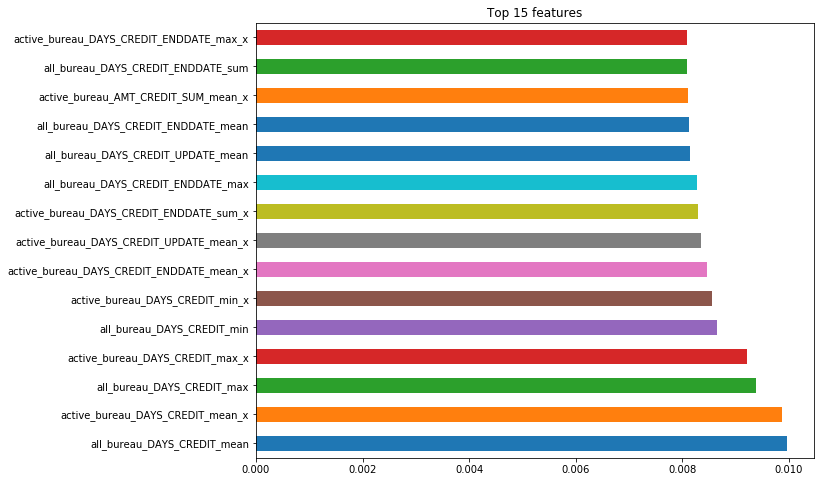

In [25]:
#data imputation and Normalize
#https://stackoverflow.com/questions/45745085/python-pandas-how-to-remove-nan-and-inf-values
bureau_with_label.replace([np.inf, -np.inf], np.nan,inplace=True)
bureau_with_label=bureau_with_label.fillna(0)
X_train=bureau_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1)
train_columns=bureau_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1).columns.values
y_train=bureau_with_label.TARGET


print(X_train.shape)

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

#fitting train data with random forest with 100 n_estimator to get feature importance
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


plt.figure(figsize=(10,8))
feature_importance= pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False).head(n=15)
feature_importance.plot(kind='barh')
plt.title("Top 15 features")



In [26]:
print("The feature importance scores :\n\n")
print(feature_importance)

The feature importance scores :


all_bureau_DAYS_CREDIT_mean                 0.009972
active_bureau_DAYS_CREDIT_mean_x            0.009878
all_bureau_DAYS_CREDIT_max                  0.009383
active_bureau_DAYS_CREDIT_max_x             0.009218
all_bureau_DAYS_CREDIT_min                  0.008652
active_bureau_DAYS_CREDIT_min_x             0.008551
active_bureau_DAYS_CREDIT_ENDDATE_mean_x    0.008465
active_bureau_DAYS_CREDIT_UPDATE_mean_x     0.008353
active_bureau_DAYS_CREDIT_ENDDATE_sum_x     0.008302
all_bureau_DAYS_CREDIT_ENDDATE_max          0.008275
all_bureau_DAYS_CREDIT_UPDATE_mean          0.008137
all_bureau_DAYS_CREDIT_ENDDATE_mean         0.008127
active_bureau_AMT_CREDIT_SUM_mean_x         0.008102
all_bureau_DAYS_CREDIT_ENDDATE_sum          0.008095
active_bureau_DAYS_CREDIT_ENDDATE_max_x     0.008081
dtype: float64


In [28]:
#dropping all non important fetures
all_feature_importance=pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False)
def feature_importance_chk(all_feature_importance,threshold=0):
    
    zero_feature_importance=[]
    non_zero_feature_importance=[]
    for i in range(len(all_feature_importance)):
        if all_feature_importance[i] <=threshold:
            zero_feature_importance.append(train_columns[i])
        else:
            non_zero_feature_importance.append(train_columns[i])
    return zero_feature_importance,non_zero_feature_importance

In [29]:
zero_feature_importance,non_zero_feature_importance=feature_importance_chk(all_feature_importance,threshold=0.001)

In [35]:
import pickle

with open(os.path.join(root_dir,'zero_feature_importance_bureau.pkl'), 'wb') as fp:
    pickle.dump(zero_feature_importance, fp)

In [36]:
with open (os.path.join(root_dir,'zero_feature_importance_bureau.pkl'), 'rb') as fp:
    zero_feature_importance = pickle.load(fp)

In [37]:
len(zero_feature_importance)

543

In [37]:
#droping the features as per the threshold
bureau_with_label.drop(columns=zero_feature_importance,axis=1,inplace=True)
print("After feature engineering final shape of bureau data: ",bureau_with_label.shape)

After feature engineering final shape of bureau data:  (307511, 216)


## 5.7. Dropping the features with feature_importance less than 0.001

In [38]:
#joing with application train to get the class label corresponding to the 'SK_ID_CURR'
temp_train=application_train[['SK_ID_CURR']]
bureau_join_train=pd.merge(temp_train,bureau_agg,how='left',on='SK_ID_CURR')
temp_test=application_test[['SK_ID_CURR']]
bureau_join_test=pd.merge(temp_test,bureau_agg,how='left',on='SK_ID_CURR')
print(bureau_join_train.shape,bureau_join_test.shape)

(307511, 758) (48744, 758)


In [39]:
bureau_join_train.drop(columns=zero_feature_importance,axis=1,inplace=True)
bureau_join_test.drop(columns=zero_feature_importance,axis=1,inplace=True)
print(bureau_join_train.shape,bureau_join_test.shape)

(307511, 215) (48744, 215)


## 5.8. Finally we have 215 features for train and test data

In [40]:
bureau_join_train.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
bureau_join_test.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)

#storing them in .csv file for futher usage
bureau_join_train.to_csv(os.path.join(root_dir,'bureau_join_train_set3.csv'),index=False)
bureau_join_test.to_csv(os.path.join(root_dir,'bureau_join_test_set3.csv'),index=False)

## 6. credit_card_balance feature engineering

## 6.1. Reading the data

In [38]:
#storing the files in dataframe for further analysis
credit_card_balance = pd.read_csv(os.path.join(root_dir,'credit_card_balance.csv'))

In [39]:
#snapshot of bureau data
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY     ...      AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325     ...              0.000                 0.000   
1                 2250.000     ...          64875.555             64875.555   
2                 2250.000     ...          31460.085             31460.085   
3                11795.760     ...         233048.970            233048.970   
4                22924.890     ...         453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [40]:
#Shape of bureau data
credit_card_balance.shape

(3840312, 23)

In [41]:
#name of bureau data columns 
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

## 6.2. preprocessing on Bureau data

In [42]:
credit_card_balance['MONTHS_BALANCE']=np.abs(credit_card_balance['MONTHS_BALANCE'])
#balance cleared to zero flag
credit_card_balance['AMT_BALANCE_ZERO_FLAG'] = credit_card_balance['AMT_BALANCE'].apply(lambda x: 1 if x==0 else 0)
#over balance max limit
credit_card_balance['AMT_BALANCE_PLUS_LIMIT'] = (credit_card_balance['AMT_BALANCE'] - credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL']).apply( lambda x: 1 if x>0 else 0)
#less payment
credit_card_balance['LESS_PAYMENT'] = (credit_card_balance['AMT_INST_MIN_REGULARITY']-credit_card_balance['AMT_PAYMENT_CURRENT']).apply( lambda x: 1 if x>0 else 0)
#dpd flag
credit_card_balance['DPD_FLAG'] = credit_card_balance['SK_DPD'].apply( lambda x: 1 if x>0 else 0)


print("Shape of credit_card_balance: ",credit_card_balance.shape)

Shape of credit_card_balance:  (3840312, 27)


## 6.3. Grouping the bureau data and applying aggregation

In [43]:
# Remove duplicate columns by values
def dedup_dataframe(data):
    unique_col = np.unique(data, axis = 1, return_index = True)[1]
    data = data.iloc[:, unique_col]
    return data

#get aggregated result on numerical features
def stat_support_num(support_data,app_id,support_id,prefix):
    #create empty dataframe
    data_numeric=pd.DataFrame()
    #storing the app_id
    data_numeric[app_id]=support_data[app_id]
    #for each column numeric only
    cnt=0
    for num_col in support_data:
        if (support_data[num_col].dtype=='int64' or support_data[num_col].dtype=='float64') and num_col !=app_id and num_col != support_id:
            data_numeric[num_col]=support_data[num_col]
            cnt+=1
            
    stats_groupby = data_numeric.groupby(app_id).agg(['count', 'mean', 'max', 'min', 'sum'])
    print("No of numerical featres : {} and after aggreagation no of total features : {}".format(cnt,5*cnt))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of numerical features :",stats_groupby.shape[1])
    return stats_groupby
         

#get aggregated result on categorical features
def stat_support_cat(support_data,app_id,support_id,prefix):    
    #create empty dataframe
    data_categorical=pd.DataFrame()
    #storing the app_id
    data_categorical[app_id]=support_data[app_id]
    #for each column categorical only
    cnt=0
    for cat_col in support_data:
        if (support_data[cat_col].dtype!='int64' and support_data[cat_col].dtype!='float64') and cat_col !=app_id and cat_col != support_id:
            data_categorical[cat_col]=support_data[cat_col]
            cnt+=1
    data_categorical = pd.get_dummies(data_categorical)
    stats_groupby = data_categorical.groupby(app_id).agg(['sum'])
    
    print("No of categorical featres : {} and after aggreagation no of total features : {}".format(cnt,data_categorical.shape[1]))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # Make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of categorical features :",stats_groupby.shape[1])

    return stats_groupby

#aggragting all the results after applyting them separately numerical/categorical data types
def agg_support(support_data,app_id,support_id,prefix):
    cnt=0
    #checking numerical feature to aggregate
    for i in support_data.select_dtypes(exclude='object').columns.values:
        if("_ID_" not in i):
            cnt+=1
    
    #checking any categorical or numerical feature to aggregate        
    if(cnt==0 and support_data.select_dtypes('object').shape[1]==0):
        print("No feature to aggregate")
    #only numerical feature to aggregate            
    elif(cnt!=0 and support_data.select_dtypes('object').shape[1]==0):
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num
    
    #only categorical feature to aggregate            
    elif(cnt==0 and support_data.select_dtypes('object').shape[1]!=0):
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_cat
        
    #if there is no categorical column
    else:
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num.merge(support_data_stat_cat, on = app_id, how = 'outer')
        
        # Remove duplicate columns by values
        after_join_num_cat=dedup_dataframe(after_join_num_cat)
    
    #after_join_num_cat.reset_index()
    print("Shape of the final dataframe: ",after_join_num_cat.shape)
    # memory management
    gc.enable()
    if cnt==0:
        del support_data_stat_cat
    elif support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num
    elif cnt!=0 and support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num,support_data_stat_cat
    gc.collect()
    return after_join_num_cat



## 6.3.1. splitting the data for 60,90,180,360,max available days wise and applying aggreagtion

In [44]:

time_span_list=[2,3,6,12,96]
def agg_credit_card_balance(data,time_span_list,app_id,support_id):
    cnt=0
    for i in time_span_list:
        temp=data[(data['MONTHS_BALANCE']<=i)]
        temp.drop('MONTHS_BALANCE',axis=1,inplace=True)
        temp=agg_support(temp,app_id,support_id,'month_'+str(i))
        cnt+=1
        if cnt > 1:
            credit_card_balance_agg=credit_card_balance_agg.merge(temp, on = app_id, how = 'outer')

        else:
            credit_card_balance_agg=temp
    credit_card_balance_agg=credit_card_balance_agg.fillna(0)
    return credit_card_balance_agg

In [45]:
#appying the aggreagtion
credit_card_balance_agg=agg_credit_card_balance(credit_card_balance,time_span_list,'SK_ID_CURR','SK_ID_PREV')

No of numerical featres : 23 and after aggreagation no of total features : 115
After removing duplicate values No of numerical features : 96
No of categorical featres : 1 and after aggreagation no of total features : 5
After removing duplicate values No of categorical features : 5
Shape of the final dataframe:  (94385, 100)
No of numerical featres : 23 and after aggreagation no of total features : 115
After removing duplicate values No of numerical features : 96
No of categorical featres : 1 and after aggreagation no of total features : 5
After removing duplicate values No of categorical features : 5
Shape of the final dataframe:  (100677, 100)
No of numerical featres : 23 and after aggreagation no of total features : 115
After removing duplicate values No of numerical features : 96
No of categorical featres : 1 and after aggreagation no of total features : 5
After removing duplicate values No of categorical features : 5
Shape of the final dataframe:  (103556, 100)
No of numerical feat

### 6.3.1. calculating a mean of few numerical features (quaterly, half-yraly and yearly)

In [46]:
def monthwise_mean(data,freq,id_col):
    l1=['DPD_FLAG','AMT_BALANCE_ZERO_FLAG','AMT_BALANCE','AMT_BALANCE_PLUS_LIMIT','LESS_PAYMENT','AMT_CREDIT_LIMIT_ACTUAL',\
'AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_CURRENT',\
'AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT',\
'AMT_INST_MIN_REGULARITY','AMT_PAYMENT_CURRENT',\
'AMT_PAYMENT_TOTAL_CURRENT','AMT_RECEIVABLE_PRINCIPAL',\
'AMT_RECIVABLE','AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',\
'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT']
    
    temp=data[l1].copy()
    temp[id_col]=data[id_col]
    temp['month_'+str(freq)]=data['MONTHS_BALANCE'].apply(lambda x: 'month_'+str(1) if x<freq \
                                                                else 'month_'+str(int(x/freq)+1))

    temp=temp.groupby([id_col,'month_'+str(freq)]).agg(['sum']).reset_index()
    temp.columns=temp.columns.droplevel(1)
    temp.columns=[str(i)+'_month_'+str(freq) if i not in [id_col,'month_'+str(freq)] else i for i in temp.columns]
    temp_quater=temp.groupby([id_col]).agg(['mean']).reset_index()
    temp_quater.columns=temp_quater.columns.droplevel(1)
    return temp_quater
    


In [47]:
temp_quater=monthwise_mean(credit_card_balance,4,'SK_ID_CURR')
temp_half_year=monthwise_mean(credit_card_balance,6,'SK_ID_CURR')
temp_year=monthwise_mean(credit_card_balance,12,'SK_ID_CURR')

In [48]:
print(temp_quater.shape,temp_half_year.shape,temp_year.shape)

(103558, 20) (103558, 20) (103558, 20)


In [49]:
credit_card_balance_agg=credit_card_balance_agg.merge(temp_quater, on = 'SK_ID_CURR', how = 'outer')
credit_card_balance_agg=credit_card_balance_agg.merge(temp_half_year, on = 'SK_ID_CURR', how = 'outer')
credit_card_balance_agg=credit_card_balance_agg.merge(temp_year, on = 'SK_ID_CURR', how = 'outer')

In [50]:
#snapshot of aggregated credit_card_balance data
credit_card_balance_agg.head()

month_2_NAME_CONTRACT_STATUS_Demand_sum  month_2_SK_DPD_DEF_min  \
0                                      0.0                     0.0   
1                                      0.0                     0.0   
2                                      0.0                     0.0   
3                                      0.0                     0.0   
4                                      0.0                     0.0   

   month_2_CNT_DRAWINGS_OTHER_CURRENT_sum  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   month_2_AMT_DRAWINGS_OTHER_CURRENT_sum  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   month_2_NAME_CONTRACT_STATUS_Signed_sum  month_2_LESS_PAYMENT_min  \
0                                      0.0                       0.0   
1                                      0.0                       0.0   
2                                      0.0                       0.0   
3                                      0.0                       0.0   
4                                      0.0                       0.0   

   month_2_DPD_FLAG_min  month_2_SK_DPD_min  month_2_SK_DPD_DEF_mean  \
0                   0.0                 0.0                      0.0   
1                   0.0                 0.0                      0.0   
2                   0.0                 0.0                      0.0   
3                   0.0                 0.0                      0.0   
4                   0.0                 0.0                      0.0   

   month_2_SK_DPD_DEF_max                 ...                   \
0                     0.0                 ...                    
1                     0.0                 ...                    
2                     0.0                 ...                    
3                     0.0                 ...                    
4                     0.0                 ...                    

   AMT_DRAWINGS_POS_CURRENT_month_12  AMT_INST_MIN_REGULARITY_month_12  \
0                              0.000                          0.000000   
1                              0.000                      41257.742143   
2                              0.000                      14383.780000   
3                              0.000                          0.000000   
4                          54932.724                      51520.257000   

   AMT_PAYMENT_CURRENT_month_12  AMT_PAYMENT_TOTAL_CURRENT_month_12  \
0                      0.000000                            0.000000   
1                  51198.107143                        47783.571429   
2                  76462.360000                        72716.505000   
3                      0.000000                            0.000000   
4                  56744.892000                        54940.293000   

   AMT_RECEIVABLE_PRINCIPAL_month_12  AMT_RECIVABLE_month_12  \
0                              0.000                   0.000   
1                         553964.940              575436.465   
2                         184059.305              193078.185   
3                              0.000                   0.000   
4                          75267.450               78092.370   

   AMT_TOTAL_RECEIVABLE_month_12  CNT_DRAWINGS_ATM_CURRENT_month_12  \
0                          0.000                           0.000000   
1                     575436.465                           0.571429   
2                     193078.185                           2.555556   
3                          0.000                           0.000000   
4                      78092.370                           0.400000   

   CNT_DRAWINGS_CURRENT_month_12  CNT_DRAWINGS_OTHER_CURRENT_month_12  
0                    

In [51]:
#name of the columns of the aggregated features
credit_card_balance_agg.columns.values

array(['month_2_NAME_CONTRACT_STATUS_Demand_sum',
       'month_2_SK_DPD_DEF_min', 'month_2_CNT_DRAWINGS_OTHER_CURRENT_sum',
       'month_2_AMT_DRAWINGS_OTHER_CURRENT_sum',
       'month_2_NAME_CONTRACT_STATUS_Signed_sum',
       'month_2_LESS_PAYMENT_min', 'month_2_DPD_FLAG_min',
       'month_2_SK_DPD_min', 'month_2_SK_DPD_DEF_mean',
       'month_2_SK_DPD_DEF_max', 'month_2_SK_DPD_DEF_sum',
       'month_2_LESS_PAYMENT_mean', 'month_2_DPD_FLAG_mean',
       'month_2_LESS_PAYMENT_max', 'month_2_LESS_PAYMENT_sum',
       'month_2_DPD_FLAG_max', 'month_2_DPD_FLAG_sum',
       'month_2_SK_DPD_mean', 'month_2_SK_DPD_max', 'month_2_SK_DPD_sum',
       'month_2_AMT_BALANCE_PLUS_LIMIT_min',
       'month_2_AMT_BALANCE_PLUS_LIMIT_mean',
       'month_2_AMT_BALANCE_PLUS_LIMIT_max',
       'month_2_AMT_BALANCE_PLUS_LIMIT_sum',
       'month_2_CNT_DRAWINGS_ATM_CURRENT_sum',
       'month_2_AMT_DRAWINGS_ATM_CURRENT_sum',
       'month_2_CNT_DRAWINGS_CURRENT_min',
       'month_2_CNT_DRAWINGS_CU

## 6.4. checking feature importance

In [52]:
temp=application_train[['SK_ID_CURR','TARGET']]
credit_card_balance_with_label=pd.merge(temp,credit_card_balance_agg,how='left',on='SK_ID_CURR')
print(credit_card_balance_with_label.shape)

(307511, 557)


(307511, 555)


Text(0.5,1,'Top 15 features')

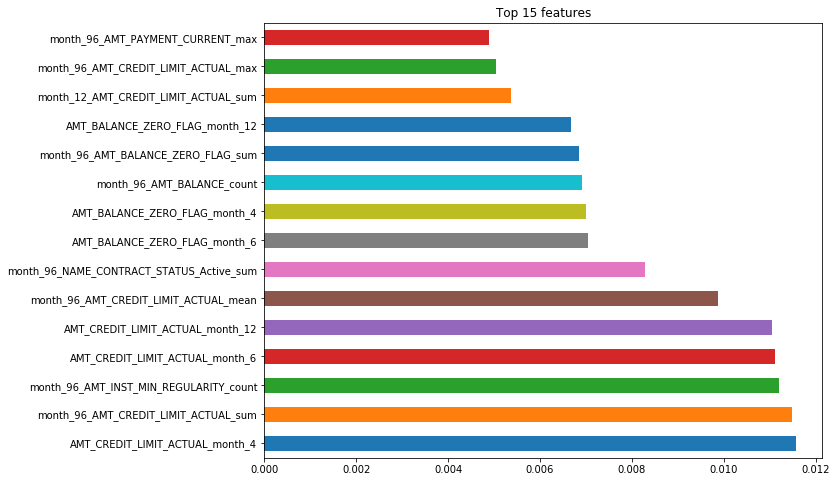

In [53]:
#data imputation and Normalize
#https://stackoverflow.com/questions/45745085/python-pandas-how-to-remove-nan-and-inf-values
credit_card_balance_with_label.replace([np.inf, -np.inf], np.nan,inplace=True)
credit_card_balance_with_label=credit_card_balance_with_label.fillna(0)
X_train=credit_card_balance_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1)
train_columns=credit_card_balance_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1).columns.values
y_train=credit_card_balance_with_label.TARGET


print(X_train.shape)

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

#fitting train data with random forest with 100 n_estimator to get feature importance
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


plt.figure(figsize=(10,8))
feature_importance= pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False).head(n=15)
feature_importance.plot(kind='barh')
plt.title("Top 15 features")



In [54]:
print("The feature importance scores :\n\n")
print(feature_importance)

The feature importance scores :


AMT_CREDIT_LIMIT_ACTUAL_month_4             0.011567
month_96_AMT_CREDIT_LIMIT_ACTUAL_sum        0.011478
month_96_AMT_INST_MIN_REGULARITY_count      0.011211
AMT_CREDIT_LIMIT_ACTUAL_month_6             0.011121
AMT_CREDIT_LIMIT_ACTUAL_month_12            0.011050
month_96_AMT_CREDIT_LIMIT_ACTUAL_mean       0.009866
month_96_NAME_CONTRACT_STATUS_Active_sum    0.008285
AMT_BALANCE_ZERO_FLAG_month_6               0.007047
AMT_BALANCE_ZERO_FLAG_month_4               0.007008
month_96_AMT_BALANCE_count                  0.006924
month_96_AMT_BALANCE_ZERO_FLAG_sum          0.006851
AMT_BALANCE_ZERO_FLAG_month_12              0.006678
month_12_AMT_CREDIT_LIMIT_ACTUAL_sum        0.005378
month_96_AMT_CREDIT_LIMIT_ACTUAL_max        0.005034
month_96_AMT_PAYMENT_CURRENT_max            0.004898
dtype: float64


In [55]:
#dropping all non important fetures
all_feature_importance=pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False)
def feature_importance_chk(all_feature_importance,threshold=0):
    
    zero_feature_importance=[]
    non_zero_feature_importance=[]
    for i in range(len(all_feature_importance)):
        if all_feature_importance[i] <=threshold:
            zero_feature_importance.append(train_columns[i])
        else:
            non_zero_feature_importance.append(train_columns[i])
    return zero_feature_importance,non_zero_feature_importance

In [56]:
zero_feature_importance,non_zero_feature_importance=feature_importance_chk(all_feature_importance,threshold=0.001)

In [58]:
with open(os.path.join(root_dir,'zero_feature_importance_credit_card_balance.pkl'), 'wb') as fp:
    pickle.dump(zero_feature_importance, fp)

In [59]:
len(zero_feature_importance)

197

## 6.5. Dropping the features with feature_importance less than 0.001

In [63]:
#droping the features as per the threshold
credit_card_balance_with_label.drop(columns=zero_feature_importance,axis=1,inplace=True)
print("After feature engineering final shape of credit_card_balance data: ",credit_card_balance_with_label.shape)

After feature engineering final shape of credit_card_balance data:  (307511, 360)


In [64]:
#joing with application train to get the class label corresponding to the 'SK_ID_CURR'
temp_train=application_train[['SK_ID_CURR']]
credit_card_balance_join_train=pd.merge(temp_train,credit_card_balance_agg,how='left',on='SK_ID_CURR')
temp_test=application_test[['SK_ID_CURR']]
credit_card_balance_join_test=pd.merge(temp_test,credit_card_balance_agg,how='left',on='SK_ID_CURR')
print(credit_card_balance_join_train.shape,credit_card_balance_join_test.shape)

(307511, 556) (48744, 556)


## 6.6. Finally we have 359 features for train and test data

In [65]:
credit_card_balance_join_train.drop(columns=zero_feature_importance,axis=1,inplace=True)
credit_card_balance_join_test.drop(columns=zero_feature_importance,axis=1,inplace=True)
print(credit_card_balance_join_train.shape,credit_card_balance_join_test.shape)


(307511, 359) (48744, 359)


In [66]:
credit_card_balance_join_train.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
credit_card_balance_join_test.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
#storing them in .csv file for futher usage
credit_card_balance_join_train.to_csv(os.path.join(root_dir,'credit_card_balance_join_train_set3.csv'),index=False)
credit_card_balance_join_test.to_csv(os.path.join(root_dir,'credit_card_balance_join_test_set3.csv'),index=False)

## 7. POS_CASH_balance feature engineering

## 7.1. Reading the data

In [60]:
#storing the files in dataframe for further analysis
POS_CASH_balance = pd.read_csv(os.path.join(root_dir,'POS_CASH_balance.csv'))

In [61]:
#snapshot of bureau data
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [62]:
#Shape of bureau data
POS_CASH_balance.shape

(10001358, 8)

In [63]:
#name of bureau data columns 
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

## 7.2. preprocessing on Bureau data

In [64]:
POS_CASH_balance['MONTHS_BALANCE']=np.abs(POS_CASH_balance['MONTHS_BALANCE'])
#Total no of installments paid and to be paid
POS_CASH_balance['TOTAL_CNT_INSTALMENT']=POS_CASH_balance['CNT_INSTALMENT']+POS_CASH_balance['CNT_INSTALMENT_FUTURE']
#ignored dpd to dpd raio
POS_CASH_balance['WAVED_SK_DPD_RATIO']=POS_CASH_balance['SK_DPD_DEF']/POS_CASH_balance['SK_DPD']
#dpd-ignored dpd
POS_CASH_balance['ACTUAL_SK_DPD']=POS_CASH_balance['SK_DPD']+POS_CASH_balance['SK_DPD_DEF']
#paid installments
POS_CASH_balance['INSTALLMENTS_PAID'] = POS_CASH_balance['CNT_INSTALMENT'] - POS_CASH_balance['CNT_INSTALMENT_FUTURE']
#dpd flag
POS_CASH_balance['DPD_FLAG'] = POS_CASH_balance['SK_DPD'].apply( lambda x: 1 if x>0 else 0)

print("Shape of POS_CASH_balance: ",POS_CASH_balance.shape)

Shape of POS_CASH_balance:  (10001358, 13)


## 7.3. Grouping the bureau data and applying aggregation

In [65]:
# Remove duplicate columns by values
def dedup_dataframe(data):
    unique_col = np.unique(data, axis = 1, return_index = True)[1]
    data = data.iloc[:, unique_col]
    return data

#get aggregated result on numerical features
def stat_support_num(support_data,app_id,support_id,prefix):
    #create empty dataframe
    data_numeric=pd.DataFrame()
    #storing the app_id
    data_numeric[app_id]=support_data[app_id]
    #for each column numeric only
    cnt=0
    for num_col in support_data:
        if (support_data[num_col].dtype=='int64' or support_data[num_col].dtype=='float64') and num_col !=app_id and num_col != support_id:
            data_numeric[num_col]=support_data[num_col]
            cnt+=1
            
    stats_groupby = data_numeric.groupby(app_id).agg(['count', 'mean', 'max', 'min', 'sum'])
    print("No of numerical featres : {} and after aggreagation no of total features : {}".format(cnt,5*cnt))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of numerical features :",stats_groupby.shape[1])
    return stats_groupby
         

#get aggregated result on categorical features
def stat_support_cat(support_data,app_id,support_id,prefix):    
    #create empty dataframe
    data_categorical=pd.DataFrame()
    #storing the app_id
    data_categorical[app_id]=support_data[app_id]
    #for each column categorical only
    cnt=0
    for cat_col in support_data:
        if (support_data[cat_col].dtype!='int64' and support_data[cat_col].dtype!='float64') and cat_col !=app_id and cat_col != support_id:
            data_categorical[cat_col]=support_data[cat_col]
            cnt+=1
    data_categorical = pd.get_dummies(data_categorical)
    stats_groupby = data_categorical.groupby(app_id).agg(['sum'])
    
    print("No of categorical featres : {} and after aggreagation no of total features : {}".format(cnt,data_categorical.shape[1]))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # Make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of categorical features :",stats_groupby.shape[1])

    return stats_groupby

#aggragting all the results after applyting them separately numerical/categorical data types
def agg_support(support_data,app_id,support_id,prefix):
    cnt=0
    #checking numerical feature to aggregate
    for i in support_data.select_dtypes(exclude='object').columns.values:
        if("_ID_" not in i):
            cnt+=1
    
    #checking any categorical or numerical feature to aggregate        
    if(cnt==0 and support_data.select_dtypes('object').shape[1]==0):
        print("No feature to aggregate")
    #only numerical feature to aggregate            
    elif(cnt!=0 and support_data.select_dtypes('object').shape[1]==0):
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num
    
    #only categorical feature to aggregate            
    elif(cnt==0 and support_data.select_dtypes('object').shape[1]!=0):
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_cat
        
    #if there is no categorical column
    else:
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num.merge(support_data_stat_cat, on = app_id, how = 'outer')
        
        # Remove duplicate columns by values
        after_join_num_cat=dedup_dataframe(after_join_num_cat)
    
    #after_join_num_cat.reset_index()
    print("Shape of the final dataframe: ",after_join_num_cat.shape)
    # memory management
    gc.enable()
    if cnt==0:
        del support_data_stat_cat
    elif support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num
    elif cnt!=0 and support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num,support_data_stat_cat
    gc.collect()
    return after_join_num_cat



### 7.4.1. splitting the time-frame as 60,90,180,360, max days and applying the aggregation

In [66]:

time_span_list=[2,3,6,12,96]
def agg_POS_CASH_balance(data,time_span_list,app_id,support_id):
    cnt=0
    for i in time_span_list:
        temp=data[(data['MONTHS_BALANCE']<=i)]
        temp.drop('MONTHS_BALANCE',axis=1,inplace=True)
        temp=agg_support(temp,app_id,support_id,'month_'+str(i))
        cnt+=1
        if cnt > 1:
            POS_CASH_balance_agg=POS_CASH_balance_agg.merge(temp, on = app_id, how = 'outer')

        else:
            POS_CASH_balance_agg=temp
    POS_CASH_balance_agg=POS_CASH_balance_agg.fillna(0)
    return POS_CASH_balance_agg

In [67]:
#applying the aggregation
POS_CASH_balance_agg=agg_POS_CASH_balance(POS_CASH_balance,time_span_list,'SK_ID_CURR','SK_ID_PREV')

No of numerical featres : 9 and after aggreagation no of total features : 45
After removing duplicate values No of numerical features : 39
No of categorical featres : 1 and after aggreagation no of total features : 9
After removing duplicate values No of categorical features : 9
Shape of the final dataframe:  (146892, 47)
No of numerical featres : 9 and after aggreagation no of total features : 45
After removing duplicate values No of numerical features : 39
No of categorical featres : 1 and after aggreagation no of total features : 9
After removing duplicate values No of categorical features : 9
Shape of the final dataframe:  (161387, 47)
No of numerical featres : 9 and after aggreagation no of total features : 45
After removing duplicate values No of numerical features : 39
No of categorical featres : 1 and after aggreagation no of total features : 9
After removing duplicate values No of categorical features : 9
Shape of the final dataframe:  (192077, 47)
No of numerical featres : 9 

In [68]:
#snashot of aggregated POS_CASH_balance data
POS_CASH_balance_agg.head()

month_2_NAME_CONTRACT_STATUS_Canceled_sum  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   month_2_NAME_CONTRACT_STATUS_Approved_sum  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   month_2_NAME_CONTRACT_STATUS_Amortized debt_sum  month_2_SK_DPD_DEF_min  \
0                                              0.0                     0.0   
1                                              0.0                     0.0   
2                                              0.0                     0.0   
3                                              0.0                     0.0   
4                                              0.0                     0.0   

   month_2_NAME_CONTRACT_STATUS_Demand_sum  month_2_WAVED_SK_DPD_RATIO_sum  \
0                                      0.0                             0.0   
1                                      0.0                             0.0   
2                                      0.0                             0.0   
3                                      0.0                             0.0   
4                                      0.0                             0.0   

   month_2_SK_DPD_DEF_mean  month_2_SK_DPD_DEF_max  month_2_SK_DPD_DEF_sum  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

   month_2_DPD_FLAG_min                ...                  \
0                   0.0                ...                   
1                   0.0                ...                   
2                   0.0                ...                   
3                   0.0                ...                   
4                   0.0                ...                   

   month_96_TOTAL_CNT_INSTALMENT_count  month_96_CNT_INSTALMENT_count  \
0                                   19                             19   
1                                   20                             20   
2                                   66                             66   
3                                   83                             83   
4                                   64                             64   

   month_96_CNT_INSTALMENT_FUTURE_count  month_96_SK_DPD_count  \
0                                    19                     19   
1                                    20                     21   
2                                    66                     66   
3                                    83                     83   
4                                    64                     64   

   month_96_CNT_INSTALMENT_FUTURE_sum  month_96_ACTUAL_SK_DPD_max  \
0                               285.0                           0   
1                               173.0                           0   
2                               592.0                           0   
3                               341.0                        1294   
4                               242.0                           0   

   month_96_ACTUAL_SK_DPD_sum  month_96_INSTALLMENTS_PAID_sum  \
0                           0                           171.0   
1                           0                            67.0   
2                           0                           420.0   
3                       28142                           615.0   
4                           0                           262.0   

   

### 7.4.2 Splitting the dataframe by 'NAME_CONTRACT_STATUS' and applying aggregation

In [69]:


POS_CASH_balance_active=POS_CASH_balance[(POS_CASH_balance['NAME_CONTRACT_STATUS']=='Active')].copy()

POS_CASH_balance_agg_active=agg_support(POS_CASH_balance_active,'SK_ID_CURR','SK_ID_PREV','active_pos')

POS_CASH_balance_completed=POS_CASH_balance[(POS_CASH_balance['NAME_CONTRACT_STATUS']=='Completed')].copy()

POS_CASH_balance_agg_completed=agg_support(POS_CASH_balance_completed,'SK_ID_CURR','SK_ID_PREV','completed_pos')



No of numerical featres : 10 and after aggreagation no of total features : 50
After removing duplicate values No of numerical features : 43
No of categorical featres : 1 and after aggreagation no of total features : 2
After removing duplicate values No of categorical features : 2
Shape of the final dataframe:  (337034, 43)
No of numerical featres : 10 and after aggreagation no of total features : 50
After removing duplicate values No of numerical features : 39
No of categorical featres : 1 and after aggreagation no of total features : 2
After removing duplicate values No of categorical features : 2
Shape of the final dataframe:  (300240, 39)


In [70]:
# join POS_CASH_balance_agg,POS_CASH_balance_agg_active,POS_CASH_balance_agg_completed,POS_CASH_balance_agg_overall
temp=POS_CASH_balance_agg.merge(POS_CASH_balance_agg_active, on = 'SK_ID_CURR', how = 'outer')
POS_CASH_balance_agg=POS_CASH_balance_agg_completed.merge(temp, on = 'SK_ID_CURR', how = 'outer')


#memory management
gc.enable()
del POS_CASH_balance_agg_active,POS_CASH_balance_agg_completed,temp
gc.collect()

42

### 7.4.3. calculating a mean of few numerical features (quaterly, half-yraly and yearly)

In [71]:
def monthwise_mean(data,freq,id_col):
    l1=['WAVED_SK_DPD_RATIO','DPD_FLAG']
    
    temp=data[l1].copy()
    temp[id_col]=data[id_col]
    temp['month_'+str(freq)]=data['MONTHS_BALANCE'].apply(lambda x: 'month_'+str(1) if x<freq \
                                                                else 'month_'+str(int(x/freq)+1))

    temp=temp.groupby([id_col,'month_'+str(freq)]).agg(['sum']).reset_index()
    temp.columns=temp.columns.droplevel(1)
    temp.columns=[str(i)+'_month_'+str(freq) if i not in [id_col,'month_'+str(freq)] else i for i in temp.columns]
    temp_quater=temp.groupby([id_col]).agg(['mean']).reset_index()
    temp_quater.columns=temp_quater.columns.droplevel(1)
    return temp_quater
    

In [72]:
temp_quater=monthwise_mean(POS_CASH_balance,4,'SK_ID_CURR')
temp_half_year=monthwise_mean(POS_CASH_balance,6,'SK_ID_CURR')
temp_year=monthwise_mean(POS_CASH_balance,12,'SK_ID_CURR')
print(temp_quater.shape,temp_half_year.shape,temp_year.shape)

(337252, 3) (337252, 3) (337252, 3)


In [73]:
POS_CASH_balance_agg=POS_CASH_balance_agg.merge(temp_quater, on = 'SK_ID_CURR', how = 'outer')
POS_CASH_balance_agg=POS_CASH_balance_agg.merge(temp_half_year, on = 'SK_ID_CURR', how = 'outer')
POS_CASH_balance_agg=POS_CASH_balance_agg.merge(temp_year, on = 'SK_ID_CURR', how = 'outer')

In [74]:
POS_CASH_balance_agg.head()

completed_pos_CNT_INSTALMENT_FUTURE_min  completed_pos_SK_DPD_DEF_min  \
0                                      0.0                           0.0   
1                                      0.0                           0.0   
2                                      0.0                           0.0   
3                                      0.0                           0.0   
4                                      0.0                           0.0   

   completed_pos_WAVED_SK_DPD_RATIO_sum  completed_pos_SK_DPD_DEF_mean  \
0                                   0.0                            0.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

   completed_pos_SK_DPD_DEF_max  completed_pos_SK_DPD_DEF_sum  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   completed_pos_CNT_INSTALMENT_FUTURE_mean  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   completed_pos_CNT_INSTALMENT_FUTURE_max  completed_pos_DPD_FLAG_min  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0                         0.0   
4                                      0.0                         0.0   

   completed_pos_DPD_FLAG_mean        ...          \
0                          0.0        ...           
1                          0.0        ...           
2                          0.0        ...           
3                          0.0        ...           
4                          0.0        ...           

   active_pos_MONTHS_BALANCE_min  active_pos_MONTHS_BALANCE_mean  \
0                           54.0                       72.428571   
1                           19.0                       45.653846   
2                           25.0                       26.000000   
3                           16.0                       20.000000   
4                            1.0                        9.166667   

   active_pos_MONTHS_BALANCE_max  active_pos_MONTHS_BALANCE_sum  \
0                           96.0                          507.0   
1                           77.0                         1187.0   
2                           27.0                           78.0   
3                           24.0                          180.0   
4                           19.0                          165.0   

   WAVED_SK_DPD_RATIO_month_4  DPD_FLAG_month_4  WAVED_SK_DPD_RATIO_month_6  \
0                        0.25              0.25                        0.25   
1                        0.00              0.00                        0.00   
2                        0.00              0.00                        0.00   
3                        0.00              0.00                        0.00   
4                        0.00              0.00                        0.00   

   DPD_FLAG_month_6  WAVED_SK_DPD_RATIO_month_12  DPD_FLAG_month_12  
0              0.25                     0.333333           0.333333  
1              0.00                     0.000000           0.000000  
2              0.00                     0.000000           0.000000  
3              0.00                     0.000000           0.000000  
4              0.00       

In [75]:
POS_CASH_balance_agg.columns.values

array(['completed_pos_CNT_INSTALMENT_FUTURE_min',
       'completed_pos_SK_DPD_DEF_min',
       'completed_pos_WAVED_SK_DPD_RATIO_sum',
       'completed_pos_SK_DPD_DEF_mean', 'completed_pos_SK_DPD_DEF_max',
       'completed_pos_SK_DPD_DEF_sum',
       'completed_pos_CNT_INSTALMENT_FUTURE_mean',
       'completed_pos_CNT_INSTALMENT_FUTURE_max',
       'completed_pos_DPD_FLAG_min', 'completed_pos_DPD_FLAG_mean',
       'completed_pos_DPD_FLAG_max',
       'completed_pos_WAVED_SK_DPD_RATIO_count',
       'completed_pos_SK_DPD_min', 'completed_pos_ACTUAL_SK_DPD_min',
       'completed_pos_SK_DPD_mean', 'completed_pos_ACTUAL_SK_DPD_mean',
       'completed_pos_SK_DPD_max', 'completed_pos_ACTUAL_SK_DPD_max',
       'completed_pos_SK_DPD_sum', 'completed_pos_ACTUAL_SK_DPD_sum',
       'completed_pos_MONTHS_BALANCE_count',
       'completed_pos_INSTALLMENTS_PAID_min',
       'completed_pos_CNT_INSTALMENT_min',
       'completed_pos_INSTALLMENTS_PAID_mean',
       'completed_pos_CNT_INSTALMEN

## 7.5. checking feature importance

In [76]:
temp=application_train[['SK_ID_CURR','TARGET']]
POS_CASH_balance_with_label=pd.merge(temp,POS_CASH_balance_agg,how='left',on='SK_ID_CURR')
print(POS_CASH_balance_with_label.shape)

(307511, 321)


(307511, 319)


Text(0.5,1,'Top 15 features')

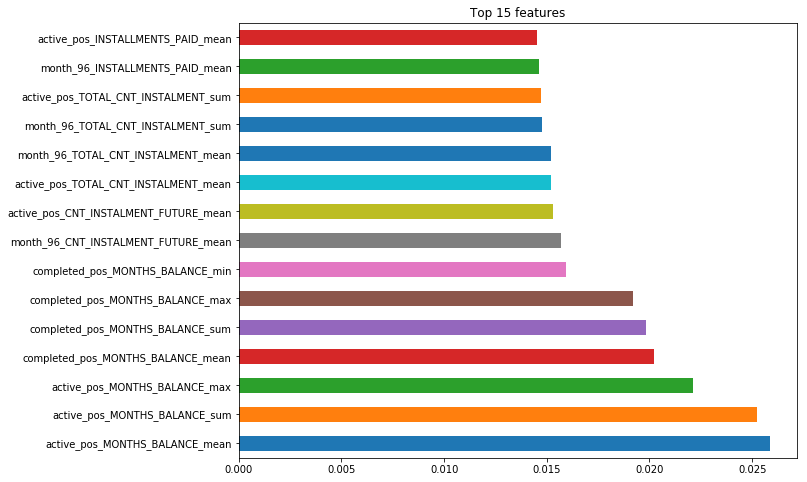

In [77]:
#data imputation and Normalize
#https://stackoverflow.com/questions/45745085/python-pandas-how-to-remove-nan-and-inf-values
POS_CASH_balance_with_label.replace([np.inf, -np.inf], np.nan,inplace=True)
POS_CASH_balance_with_label=POS_CASH_balance_with_label.fillna(0)
X_train=POS_CASH_balance_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1)
train_columns=POS_CASH_balance_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1).columns.values
y_train=POS_CASH_balance_with_label.TARGET


print(X_train.shape)

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

#fitting train data with random forest with 100 n_estimator to get feature importance
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


plt.figure(figsize=(10,8))
feature_importance= pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False).head(n=15)
feature_importance.plot(kind='barh')
plt.title("Top 15 features")



In [78]:
print("The feature importance scores :\n\n")
print(feature_importance)

The feature importance scores :


active_pos_MONTHS_BALANCE_mean           0.025875
active_pos_MONTHS_BALANCE_sum            0.025243
active_pos_MONTHS_BALANCE_max            0.022099
completed_pos_MONTHS_BALANCE_mean        0.020241
completed_pos_MONTHS_BALANCE_sum         0.019831
completed_pos_MONTHS_BALANCE_max         0.019205
completed_pos_MONTHS_BALANCE_min         0.015934
month_96_CNT_INSTALMENT_FUTURE_mean      0.015681
active_pos_CNT_INSTALMENT_FUTURE_mean    0.015311
active_pos_TOTAL_CNT_INSTALMENT_mean     0.015220
month_96_TOTAL_CNT_INSTALMENT_mean       0.015219
month_96_TOTAL_CNT_INSTALMENT_sum        0.014775
active_pos_TOTAL_CNT_INSTALMENT_sum      0.014716
month_96_INSTALLMENTS_PAID_mean          0.014631
active_pos_INSTALLMENTS_PAID_mean        0.014521
dtype: float64


In [79]:
#dropping all non important fetures
all_feature_importance=pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False)
def feature_importance_chk(all_feature_importance,threshold=0):
    
    zero_feature_importance=[]
    non_zero_feature_importance=[]
    for i in range(len(all_feature_importance)):
        if all_feature_importance[i] <=threshold:
            zero_feature_importance.append(train_columns[i])
        else:
            non_zero_feature_importance.append(train_columns[i])
    return zero_feature_importance,non_zero_feature_importance

In [80]:
zero_feature_importance,non_zero_feature_importance=feature_importance_chk(all_feature_importance,threshold=0.001)

In [83]:
with open(os.path.join(root_dir,'zero_feature_importance_POS_CASH_balance.pkl'), 'wb') as fp:
    pickle.dump(zero_feature_importance, fp)

In [84]:
#low feature importance columns to be dropped
len(zero_feature_importance)

147

In [106]:
POS_CASH_balance_with_label.drop(columns=zero_feature_importance,axis=1,inplace=True)
print("After feature engineering final shape of POS_CASH_balance data: ",POS_CASH_balance_with_label.shape)

After feature engineering final shape of POS_CASH_balance data:  (307511, 174)


## 7.6. Dropping the features with feature_importance less than 0.001

In [107]:
#joing with application train to get the class label corresponding to the 'SK_ID_CURR'
temp_train=application_train[['SK_ID_CURR']]
POS_CASH_balance_join_train=pd.merge(temp_train,POS_CASH_balance_agg,how='left',on='SK_ID_CURR')
temp_test=application_test[['SK_ID_CURR']]
POS_CASH_balance_join_test=pd.merge(temp_test,POS_CASH_balance_agg,how='left',on='SK_ID_CURR')
print(POS_CASH_balance_join_train.shape,POS_CASH_balance_join_test.shape)

(307511, 320) (48744, 320)


In [108]:
POS_CASH_balance_join_train.drop(columns=zero_feature_importance,axis=1,inplace=True)
POS_CASH_balance_join_test.drop(columns=zero_feature_importance,axis=1,inplace=True)
print(POS_CASH_balance_join_train.shape,POS_CASH_balance_join_test.shape)


(307511, 173) (48744, 173)


## 7.7. Finally we have 173 features for train and test data

In [110]:
POS_CASH_balance_join_train.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
POS_CASH_balance_join_test.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)


#storing them in .csv file for futher usage
POS_CASH_balance_join_train.to_csv(os.path.join(root_dir,'POS_CASH_balance_join_train_set3.csv'),index=False)
POS_CASH_balance_join_test.to_csv(os.path.join(root_dir,'POS_CASH_balance_join_test_set3.csv'),index=False)

## 8. installments_payments feature engineering

## 8.1 Reading the dataset

In [85]:
#storing the files in dataframe for further analysis
installments_payments = pd.read_csv(os.path.join(root_dir,'installments_payments.csv'))


In [86]:
#Shape of the dataframe
installments_payments.shape


(13605401, 8)

In [87]:
#snapshot of installments_payments data
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [88]:
#name of the columns
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [89]:

#payment was after the installment date
installments_payments['LATE_PAYMENT_FLAG'] = (installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']).apply(lambda x: 1 if x>0 else 0)
#payment was less than the installment amount
installments_payments['LESS_PAYMENT_FLAG'] = (installments_payments['AMT_PAYMENT'] - installments_payments['AMT_INSTALMENT']).apply(lambda x: 1 if x>0 else 0)


In [90]:

# Remove duplicate columns by values
def dedup_dataframe(data):
    unique_col = np.unique(data, axis = 1, return_index = True)[1]
    data = data.iloc[:, unique_col]
    return data

#get aggregated result on numerical features
def stat_support_num(support_data,app_id,support_id,prefix):
    #create empty dataframe
    data_numeric=pd.DataFrame()
    #storing the app_id
    data_numeric[app_id]=support_data[app_id]
    #for each column numeric only
    cnt=0
    for num_col in support_data:
        if (support_data[num_col].dtype=='int64' or support_data[num_col].dtype=='float64') and num_col !=app_id and num_col != support_id:
            data_numeric[num_col]=support_data[num_col]
            cnt+=1
            
    stats_groupby = data_numeric.groupby(app_id).agg(['count', 'mean', 'max', 'min', 'sum'])
    print("No of numerical featres : {} and after aggreagation no of total features : {}".format(cnt,5*cnt))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of numerical features :",stats_groupby.shape[1])
    return stats_groupby
         

#get aggregated result on categorical features
def stat_support_cat(support_data,app_id,support_id,prefix):    
    #create empty dataframe
    data_categorical=pd.DataFrame()
    #storing the app_id
    data_categorical[app_id]=support_data[app_id]
    #for each column categorical only
    cnt=0
    for cat_col in support_data:
        if (support_data[cat_col].dtype!='int64' and support_data[cat_col].dtype!='float64') and cat_col !=app_id and cat_col != support_id:
            data_categorical[cat_col]=support_data[cat_col]
            cnt+=1
    data_categorical = pd.get_dummies(data_categorical)
    stats_groupby = data_categorical.groupby(app_id).agg(['sum'])
    
    print("No of categorical featres : {} and after aggreagation no of total features : {}".format(cnt,data_categorical.shape[1]))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # Make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of categorical features :",stats_groupby.shape[1])

    return stats_groupby

#aggragting all the results after applyting them separately numerical/categorical data types
def agg_support(support_data,app_id,support_id,prefix):
    cnt=0
    #checking numerical feature to aggregate
    for i in support_data.select_dtypes(exclude='object').columns.values:
        if("_ID_" not in i):
            cnt+=1
    
    #checking any categorical or numerical feature to aggregate        
    if(cnt==0 and support_data.select_dtypes('object').shape[1]==0):
        print("No feature to aggregate")
    #only numerical feature to aggregate            
    elif(cnt!=0 and support_data.select_dtypes('object').shape[1]==0):
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num
    
    #only categorical feature to aggregate            
    elif(cnt==0 and support_data.select_dtypes('object').shape[1]!=0):
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_cat
        
    #if there is no categorical column
    else:
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num.merge(support_data_stat_cat, on = app_id, how = 'outer')
        
        # Remove duplicate columns by values
        after_join_num_cat=dedup_dataframe(after_join_num_cat)
    
    #after_join_num_cat.reset_index()
    print("Shape of the final dataframe: ",after_join_num_cat.shape)
    # memory management
    gc.enable()
    if cnt==0:
        del support_data_stat_cat
    elif support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num
    elif cnt!=0 and support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num,support_data_stat_cat
    gc.collect()
    return after_join_num_cat




## 8.2. Grouping by aggreagtion

In [91]:

#applying the aggreagtion function
installments_payments_agg=agg_support(installments_payments,'SK_ID_CURR','SK_ID_PREV','installments_payments')


No of numerical featres : 8 and after aggreagation no of total features : 40
After removing duplicate values No of numerical features : 35
Shape of the final dataframe:  (339587, 35)


In [92]:

#aggragted installments_payments snapshot
installments_payments_agg.head()


installments_payments_DAYS_ENTRY_PAYMENT_sum  \
SK_ID_CURR                                                 
100001                                          -15365.0   
100002                                           -5993.0   
100003                                          -34633.0   
100004                                           -2285.0   
100005                                           -5486.0   

            installments_payments_DAYS_INSTALMENT_sum  \
SK_ID_CURR                                              
100001                                       -15314.0   
100002                                        -5605.0   
100003                                       -34454.0   
100004                                        -2262.0   
100005                                        -5274.0   

            installments_payments_DAYS_ENTRY_PAYMENT_min  \
SK_ID_CURR                                                 
100001                                           -2916.0   
100002                                            -587.0   
100003                                           -2324.0   
100004                                            -795.0   
100005                                            -736.0   

            installments_payments_DAYS_INSTALMENT_min  \
SK_ID_CURR                                              
100001                                        -2916.0   
100002                                         -565.0   
100003                                        -2310.0   
100004                                         -784.0   
100005                                         -706.0   

            installments_payments_DAYS_ENTRY_PAYMENT_mean  \
SK_ID_CURR                                                  
100001                                       -2195.000000   
100002                                        -315.421053   
100003                                       -1385.320000   
100004                                        -761.666667   
100005                                        -609.555556   

            installments_payments_DAYS_INSTALMENT_mean  \
SK_ID_CURR                                               
100001                                    -2187.714286   
100002                                     -295.000000   
100003                                    -1378.160000   
100004                                     -754.000000   
100005                                     -586.000000   

            installments_payments_DAYS_ENTRY_PAYMENT_max  \
SK_ID_CURR                                                 
100001                                           -1628.0   
100002                                             -49.0   
100003                                            -544.0   
100004                                            -727.0   
100005                                            -470.0   

            installments_payments_DAYS_INSTALMENT_max  \
SK_ID_CURR                                              
100001                                        -1619.0   
100002                                          -25.0   
100003                                         -536.0   
100004                                         -724.0   
100005                                         -466.0   

            installments_payments_LESS_PAYMENT_FLAG_min  \
SK_ID_CURR                                                
100001                                                0   
100002                                                0   
100003                                                0   
100004                                                0   
100005                                                0   

            installments_payments_LATE_PAYMENT_FLAG_min     ...      \
SK_ID_CURR                                                  ...       
100001                                                0     ...       
100002                                                0     ...       
100003          

In [93]:

installments_payments_agg.columns.values


array(['installments_payments_DAYS_ENTRY_PAYMENT_sum',
       'installments_payments_DAYS_INSTALMENT_sum',
       'installments_payments_DAYS_ENTRY_PAYMENT_min',
       'installments_payments_DAYS_INSTALMENT_min',
       'installments_payments_DAYS_ENTRY_PAYMENT_mean',
       'installments_payments_DAYS_INSTALMENT_mean',
       'installments_payments_DAYS_ENTRY_PAYMENT_max',
       'installments_payments_DAYS_INSTALMENT_max',
       'installments_payments_LESS_PAYMENT_FLAG_min',
       'installments_payments_LATE_PAYMENT_FLAG_min',
       'installments_payments_LESS_PAYMENT_FLAG_mean',
       'installments_payments_LESS_PAYMENT_FLAG_max',
       'installments_payments_LESS_PAYMENT_FLAG_sum',
       'installments_payments_LATE_PAYMENT_FLAG_mean',
       'installments_payments_LATE_PAYMENT_FLAG_max',
       'installments_payments_LATE_PAYMENT_FLAG_sum',
       'installments_payments_NUM_INSTALMENT_VERSION_min',
       'installments_payments_NUM_INSTALMENT_NUMBER_min',
       'installment

## 8.3. checking feature importance

In [94]:
temp=application_train[['SK_ID_CURR','TARGET']]
installments_payments_with_label=pd.merge(temp,installments_payments_agg,how='left',on='SK_ID_CURR')
print(installments_payments_with_label.shape)

(307511, 36)


(307511, 34)


Text(0.5,1,'Top 15 features')

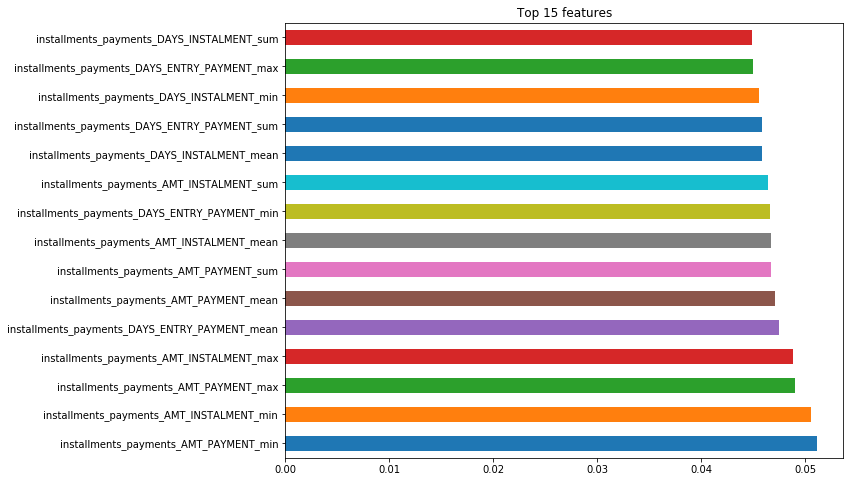

In [95]:


#data imputation and Normalize
#https://stackoverflow.com/questions/45745085/python-pandas-how-to-remove-nan-and-inf-values
installments_payments_with_label.replace([np.inf, -np.inf], np.nan,inplace=True)
installments_payments_with_label=installments_payments_with_label.fillna(0)
X_train=installments_payments_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1)
train_columns=installments_payments_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1).columns.values
y_train=installments_payments_with_label.TARGET


print(X_train.shape)

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

#fitting train data with random forest with 100 n_estimator to get feature importance
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


plt.figure(figsize=(10,8))
feature_importance= pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False).head(n=15)
feature_importance.plot(kind='barh')
plt.title("Top 15 features")


In [96]:
print("The feature importance scores :\n\n")
print(feature_importance)

The feature importance scores :


installments_payments_AMT_PAYMENT_min            0.051086
installments_payments_AMT_INSTALMENT_min         0.050580
installments_payments_AMT_PAYMENT_max            0.048987
installments_payments_AMT_INSTALMENT_max         0.048805
installments_payments_DAYS_ENTRY_PAYMENT_mean    0.047477
installments_payments_AMT_PAYMENT_mean           0.047068
installments_payments_AMT_PAYMENT_sum            0.046698
installments_payments_AMT_INSTALMENT_mean        0.046666
installments_payments_DAYS_ENTRY_PAYMENT_min     0.046598
installments_payments_AMT_INSTALMENT_sum         0.046416
installments_payments_DAYS_INSTALMENT_mean       0.045847
installments_payments_DAYS_ENTRY_PAYMENT_sum     0.045788
installments_payments_DAYS_INSTALMENT_min        0.045574
installments_payments_DAYS_ENTRY_PAYMENT_max     0.045017
installments_payments_DAYS_INSTALMENT_sum        0.044912
dtype: float64


In [97]:
#dropping all non important fetures
all_feature_importance=pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False)
def feature_importance_chk(all_feature_importance,threshold=0):
    
    zero_feature_importance=[]
    non_zero_feature_importance=[]
    for i in range(len(all_feature_importance)):
        if all_feature_importance[i] <=threshold:
            zero_feature_importance.append(train_columns[i])
        else:
            non_zero_feature_importance.append(train_columns[i])
    return zero_feature_importance,non_zero_feature_importance


In [98]:
zero_feature_importance,non_zero_feature_importance=feature_importance_chk(all_feature_importance,0.001)

zero_feature_importance

['installments_payments_AMT_PAYMENT_max',
 'installments_payments_AMT_PAYMENT_sum',
 'installments_payments_AMT_INSTALMENT_sum']

In [99]:
with open(os.path.join(root_dir,'zero_feature_importance_installments_payments.pkl'), 'wb') as fp:
    pickle.dump(zero_feature_importance, fp)

In [125]:
#droping the features as per the threshold
installments_payments_with_label.drop(columns=zero_feature_importance,axis=1,inplace=True)
print("After feature engineering final shape of installments_payments data: ",installments_payments_with_label.shape)


After feature engineering final shape of installments_payments data:  (307511, 33)


## 8.4. Dropping the features with feature_importance less than 0.001

In [126]:
#joing with application train to get the class label corresponding to the 'SK_ID_CURR'
temp_train=application_train[['SK_ID_CURR']]
installments_payments_join_train=pd.merge(temp_train,installments_payments_agg,how='left',on='SK_ID_CURR')
temp_test=application_test[['SK_ID_CURR']]
installments_payments_join_test=pd.merge(temp_test,installments_payments_agg,how='left',on='SK_ID_CURR')
print(installments_payments_join_train.shape,installments_payments_join_test.shape)


(307511, 35) (48744, 35)


## 8.5. Finally we have 32 features for train and test data

In [127]:

installments_payments_join_train.drop(columns=zero_feature_importance,axis=1,inplace=True)
installments_payments_join_test.drop(columns=zero_feature_importance,axis=1,inplace=True)
print(installments_payments_join_train.shape,installments_payments_join_test.shape)


(307511, 32) (48744, 32)


In [128]:
installments_payments_join_train.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
installments_payments_join_test.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
#storing them in .csv file for futher usage
installments_payments_join_train.to_csv(os.path.join(root_dir,'installments_payments_join_train_set3.csv'),index=False)
installments_payments_join_test.to_csv(os.path.join(root_dir,'installments_payments_join_test_set3.csv'),index=False)


## 9. previous_application feature engineering

## 9.1 Reading the dataset

In [100]:
#storing the files in dataframe for further analysis
previous_application = pd.read_csv(os.path.join(root_dir,'previous_application.csv'))


In [101]:
#Shape of the dataframe
previous_application.shape


(1670214, 37)

In [102]:
#snapshot of installments_payments data
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START            ...            NAME_SELLER_INDUSTRY  \
0                       15            ...                    Connectivity   
1                       11            ...                             XNA   
2                       11            ...                             XNA   
3                        7            ...                             XNA   
4                        9            ...                             XNA   

   CNT_PAYMENT  NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
0         12.0            middle  POS mobile with interest   
1         36.0        low_action          Cash X-Sell: low   
2         12.0              high         Cash X-Sell: high   
3         12.0            middle       Cash X-Sell: middle   
4         24.0              high         Cash Street: high   

   DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0            365243.0          -42.0                     300.0          -42.0   
1            365243.0         -134.0                     916.0       365243.0   
2            365243.0         -271.0                      59.0       365243.0   
3            365243.0         -482.0                    -152.0         -182.0   
4                 NaN            NaN                       NaN            NaN   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0            -37.0                       0.0  
1         365243.0                       1.0  
2         365243.0                       1.0  
3           -177.0                       1.0  
4              NaN                       NaN  

[5 rows x 37 columns]

In [103]:
#name of the columns
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [104]:
#as er the EDA removing 365243 in 'DAYS_X' features
previous_application['DAYS_FIRST_DRAWING'][previous_application['DAYS_FIRST_DRAWING'] == 365243.0] = np.nan
previous_application['DAYS_FIRST_DUE'][previous_application['DAYS_FIRST_DUE'] == 365243.0] = np.nan
previous_application['DAYS_LAST_DUE_1ST_VERSION'][previous_application['DAYS_LAST_DUE_1ST_VERSION'] == 365243.0] = np.nan
previous_application['DAYS_LAST_DUE'][previous_application['DAYS_LAST_DUE'] == 365243.0] = np.nan
previous_application['DAYS_TERMINATION'][previous_application['DAYS_TERMINATION'] == 365243.0] = np.nan
#domain knowledge and winner solution 10th place
#https://www.kaggle.com/c/home-credit-default-risk/discussion/64598
previous_application['ANNUITY_CREDIT_RATIO'] = previous_application['AMT_ANNUITY'] / previous_application['AMT_CREDIT']
previous_application['CREDIT_APPLICATION_AMT_DIFF'] = previous_application['AMT_CREDIT'] - previous_application['AMT_APPLICATION']
previous_application['INTEREST'] = previous_application['CNT_PAYMENT']*previous_application['AMT_ANNUITY'] - previous_application['AMT_CREDIT']
previous_application['INTEREST_RATE'] = 2*12*previous_application['INTEREST']/(previous_application['AMT_CREDIT']*(previous_application['CNT_PAYMENT']+1))
previous_application['INTEREST_SHARE'] = previous_application['INTEREST']/previous_application['AMT_CREDIT']

In [105]:

# Remove duplicate columns by values
def dedup_dataframe(data):
    unique_col = np.unique(data, axis = 1, return_index = True)[1]
    data = data.iloc[:, unique_col]
    return data

#get aggregated result on numerical features
def stat_support_num(support_data,app_id,support_id,prefix):
    #create empty dataframe
    data_numeric=pd.DataFrame()
    #storing the app_id
    data_numeric[app_id]=support_data[app_id]
    #for each column numeric only
    cnt=0
    for num_col in support_data:
        if (support_data[num_col].dtype=='int64' or support_data[num_col].dtype=='float64') and num_col !=app_id and num_col != support_id:
            data_numeric[num_col]=support_data[num_col]
            cnt+=1
            
    stats_groupby = data_numeric.groupby(app_id).agg(['count', 'mean', 'max', 'min', 'sum'])
    print("No of numerical featres : {} and after aggreagation no of total features : {}".format(cnt,5*cnt))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of numerical features :",stats_groupby.shape[1])
    return stats_groupby
         

#get aggregated result on categorical features
def stat_support_cat(support_data,app_id,support_id,prefix):    
    #create empty dataframe
    data_categorical=pd.DataFrame()
    #storing the app_id
    data_categorical[app_id]=support_data[app_id]
    #for each column categorical only
    cnt=0
    for cat_col in support_data:
        if (support_data[cat_col].dtype!='int64' and support_data[cat_col].dtype!='float64') and cat_col !=app_id and cat_col != support_id:
            data_categorical[cat_col]=support_data[cat_col]
            cnt+=1
    data_categorical = pd.get_dummies(data_categorical)
    stats_groupby = data_categorical.groupby(app_id).agg(['sum'])
    
    print("No of categorical featres : {} and after aggreagation no of total features : {}".format(cnt,data_categorical.shape[1]))
    column_name = []
    
    for j in stats_groupby.columns.levels[0]:
        if j != app_id:
            # for each stat
            for k in stats_groupby.columns.levels[1]:
                # Make a new column name 
                column_name.append('{}_{}_{}'.format(prefix,j, k))
    
    stats_groupby.columns = column_name
    
    #assigning the id column
    stats_groupby[app_id]=stats_groupby.index
    
    # Remove duplicate columns by values
    stats_groupby=dedup_dataframe(stats_groupby)
    
    print("After removing duplicate values No of categorical features :",stats_groupby.shape[1])

    return stats_groupby

#aggragting all the results after applyting them separately numerical/categorical data types
def agg_support(support_data,app_id,support_id,prefix):
    cnt=0
    #checking numerical feature to aggregate
    for i in support_data.select_dtypes(exclude='object').columns.values:
        if("_ID_" not in i):
            cnt+=1
    
    #checking any categorical or numerical feature to aggregate        
    if(cnt==0 and support_data.select_dtypes('object').shape[1]==0):
        print("No feature to aggregate")
    #only numerical feature to aggregate            
    elif(cnt!=0 and support_data.select_dtypes('object').shape[1]==0):
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num
    
    #only categorical feature to aggregate            
    elif(cnt==0 and support_data.select_dtypes('object').shape[1]!=0):
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_cat
        
    #if there is no categorical column
    else:
        support_data_stat_num=stat_support_num(support_data,app_id,support_id,prefix)
        support_data_stat_cat=stat_support_cat(support_data,app_id,support_id,prefix)
        after_join_num_cat=support_data_stat_num.merge(support_data_stat_cat, on = app_id, how = 'outer')
        
        # Remove duplicate columns by values
        after_join_num_cat=dedup_dataframe(after_join_num_cat)
    
    #after_join_num_cat.reset_index()
    print("Shape of the final dataframe: ",after_join_num_cat.shape)
    # memory management
    gc.enable()
    if cnt==0:
        del support_data_stat_cat
    elif support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num
    elif cnt!=0 and support_data.select_dtypes('object').shape[1]==0:
        del support_data_stat_num,support_data_stat_cat
    gc.collect()
    return after_join_num_cat




## 9.2. Grouping by aggreagtion

In [106]:
#applying aggregation function on previous_application data
previous_application_agg=agg_support(previous_application,'SK_ID_CURR','SK_ID_PREV','previous')

No of numerical featres : 24 and after aggreagation no of total features : 120
After removing duplicate values No of numerical features : 112
No of categorical featres : 16 and after aggreagation no of total features : 144
After removing duplicate values No of categorical features : 143
Shape of the final dataframe:  (338857, 254)


In [107]:
#snapshot of previous_application data
previous_application_agg.head()

previous_DAYS_DECISION_sum  previous_DAYS_DECISION_min  \
0                       -1740                       -1740   
1                        -606                        -606   
2                       -3915                       -2341   
3                        -815                        -815   
4                       -1072                        -757   

   previous_DAYS_DECISION_mean  previous_DAYS_DECISION_max  \
0                      -1740.0                       -1740   
1                       -606.0                        -606   
2                      -1305.0                        -746   
3                       -815.0                        -815   
4                       -536.0                        -315   

   previous_DAYS_FIRST_DUE_sum  previous_DAYS_FIRST_DUE_min  \
0                      -1709.0                      -1709.0   
1                       -565.0                       -565.0   
2                      -3823.0                      -2310.0   
3                       -784.0                       -784.0   
4                       -706.0                       -706.0   

   previous_DAYS_FIRST_DUE_mean  previous_DAYS_FIRST_DUE_max  \
0                  -1709.000000                      -1709.0   
1                   -565.000000                       -565.0   
2                  -1274.333333                       -716.0   
3                   -784.000000                       -784.0   
4                   -706.000000                       -706.0   

   previous_DAYS_LAST_DUE_sum  previous_DAYS_LAST_DUE_min  \
0                     -1619.0                     -1619.0   
1                       -25.0                       -25.0   
2                     -3163.0                     -1980.0   
3                      -724.0                      -724.0   
4                      -466.0                      -466.0   

                   ...                    SK_ID_CURR  \
0                  ...                        100001   
1                  ...                        100002   
2                  ...                        100003   
3                  ...                        100004   
4                  ...                        100005   

   previous_DAYS_FIRST_DRAWING_min  previous_DAYS_FIRST_DRAWING_mean  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   

   previous_DAYS_FIRST_DRAWING_max  previous_RATE_INTEREST_PRIMARY_min  \
0                              NaN                                 NaN   
1                              NaN                                 NaN   
2                              NaN                                 NaN   
3                              NaN                                 NaN   
4                              NaN                                 NaN   

   previous_RATE_INTEREST_PRIMARY_mean  previous_RATE_INTEREST_PRIMARY_max  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   

   previous_RATE_INTEREST_PRIVILEGED_min  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   previous_RATE_INTEREST_PRIVILEGED_mean  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3  

In [108]:
#name of all the aggregarted column of previous_application data
previous_application_agg.columns.values

array(['previous_DAYS_DECISION_sum', 'previous_DAYS_DECISION_min',
       'previous_DAYS_DECISION_mean', 'previous_DAYS_DECISION_max',
       'previous_DAYS_FIRST_DUE_sum', 'previous_DAYS_FIRST_DUE_min',
       'previous_DAYS_FIRST_DUE_mean', 'previous_DAYS_FIRST_DUE_max',
       'previous_DAYS_LAST_DUE_sum', 'previous_DAYS_LAST_DUE_min',
       'previous_DAYS_LAST_DUE_mean', 'previous_DAYS_LAST_DUE_max',
       'previous_DAYS_TERMINATION_sum', 'previous_DAYS_TERMINATION_min',
       'previous_DAYS_TERMINATION_mean', 'previous_DAYS_TERMINATION_max',
       'previous_DAYS_LAST_DUE_1ST_VERSION_sum',
       'previous_DAYS_LAST_DUE_1ST_VERSION_min',
       'previous_DAYS_LAST_DUE_1ST_VERSION_mean',
       'previous_DAYS_LAST_DUE_1ST_VERSION_max',
       'previous_CREDIT_APPLICATION_AMT_DIFF_min',
       'previous_CREDIT_APPLICATION_AMT_DIFF_mean',
       'previous_CREDIT_APPLICATION_AMT_DIFF_max',
       'previous_CREDIT_APPLICATION_AMT_DIFF_sum',
       'previous_DAYS_FIRST_DRAWING_sum',


## 9.3. checking feature importance

In [109]:
temp=application_train[['SK_ID_CURR','TARGET']]
previous_application_with_label=pd.merge(temp,previous_application_agg,how='left',on='SK_ID_CURR')
print(previous_application_with_label.shape)

(307511, 255)


(307511, 253)


Text(0.5,1,'Top 15 features')

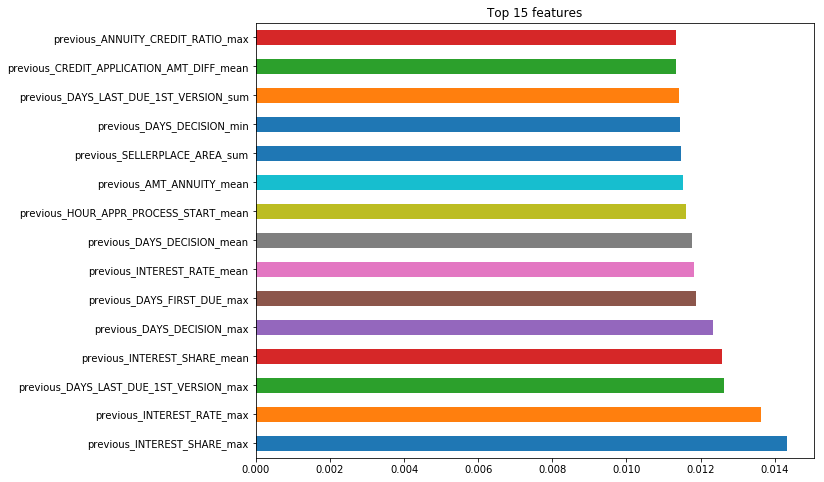

In [110]:
#data imputation and Normalize
#https://stackoverflow.com/questions/45745085/python-pandas-how-to-remove-nan-and-inf-values
previous_application_with_label.replace([np.inf, -np.inf], np.nan,inplace=True)
previous_application_with_label=previous_application_with_label.fillna(0)
X_train=previous_application_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1)
train_columns=previous_application_with_label.drop(columns=['TARGET','SK_ID_CURR'],axis=1).columns.values
y_train=previous_application_with_label.TARGET


print(X_train.shape)

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

#fitting train data with random forest with 100 n_estimator to get feature importance
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


plt.figure(figsize=(10,8))
feature_importance= pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False).head(n=15)
feature_importance.plot(kind='barh')
plt.title("Top 15 features")



In [111]:
print("The feature importance scores :\n\n")
print(feature_importance)

The feature importance scores :


previous_INTEREST_SHARE_max                  0.014332
previous_INTEREST_RATE_max                   0.013639
previous_DAYS_LAST_DUE_1ST_VERSION_max       0.012620
previous_INTEREST_SHARE_mean                 0.012587
previous_DAYS_DECISION_max                   0.012332
previous_DAYS_FIRST_DUE_max                  0.011862
previous_INTEREST_RATE_mean                  0.011829
previous_DAYS_DECISION_mean                  0.011768
previous_HOUR_APPR_PROCESS_START_mean        0.011610
previous_AMT_ANNUITY_mean                    0.011523
previous_SELLERPLACE_AREA_sum                0.011471
previous_DAYS_DECISION_min                   0.011454
previous_DAYS_LAST_DUE_1ST_VERSION_sum       0.011420
previous_CREDIT_APPLICATION_AMT_DIFF_mean    0.011348
previous_ANNUITY_CREDIT_RATIO_max            0.011347
dtype: float64


In [112]:
#dropping all non important fetures
all_feature_importance=pd.Series(clf.feature_importances_, index=train_columns).sort_values(ascending=False)
def feature_importance_chk(all_feature_importance,threshold=0):
    
    zero_feature_importance=[]
    non_zero_feature_importance=[]
    for i in range(len(all_feature_importance)):
        if all_feature_importance[i] <=threshold:
            zero_feature_importance.append(train_columns[i])
        else:
            non_zero_feature_importance.append(train_columns[i])
    return zero_feature_importance,non_zero_feature_importance


In [114]:
zero_feature_importance,non_zero_feature_importance=feature_importance_chk(all_feature_importance,0.001)

len(zero_feature_importance)

78

In [115]:
with open(os.path.join(root_dir,'zero_feature_importance_previous_application.pkl'), 'wb') as fp:
    pickle.dump(zero_feature_importance, fp)

In [18]:
#droping the features as per the threshold
previous_application_with_label.drop(columns=zero_feature_importance,axis=1,inplace=True)
print("After feature engineering final shape of previous_application data: ",previous_application_with_label.shape)

After feature engineering final shape of previous_application data:  (307511, 177)


## 9.4. Dropping the features with feature_importance less than 0.001

In [19]:
#joing with application train to get the class label corresponding to the 'SK_ID_CURR'
temp_train=application_train[['SK_ID_CURR']]
previous_application_join_train=pd.merge(temp_train,previous_application_agg,how='left',on='SK_ID_CURR')
temp_test=application_test[['SK_ID_CURR']]
previous_application_join_test=pd.merge(temp_test,previous_application_agg,how='left',on='SK_ID_CURR')
print(previous_application_join_train.shape,previous_application_join_test.shape)


(307511, 254) (48744, 254)


## 9.5. Finally we have 176 features for train and test data

In [20]:
previous_application_join_train.drop(columns=zero_feature_importance,axis=1,inplace=True)
previous_application_join_test.drop(columns=zero_feature_importance,axis=1,inplace=True)
print(previous_application_join_train.shape,previous_application_join_test.shape)

(307511, 176) (48744, 176)


In [21]:
#without imputation
previous_application_join_train.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
previous_application_join_test.sort_values(by='SK_ID_CURR',ascending=True, inplace=True)
#storing them in .csv file for futher usage
previous_application_join_train.to_csv(os.path.join(root_dir,'previous_application_join_train_set3.csv'),index=False)
previous_application_join_test.to_csv(os.path.join(root_dir,'previous_application_join_test_set3.csv'),index=False)

## 10. Preparing two set of train and test data
### 10.1. Set1: only using application_train and application_test data (426 features)

In [24]:
application_train_final=pd.read_csv(os.path.join(root_dir,'application_train_final_app_only.csv'))
application_test_final=pd.read_csv(os.path.join(root_dir,'application_test_final_app_only.csv'))
print(application_train_final.shape,application_test_final.shape)

(307511, 426) (48744, 426)


In [25]:
#applying this utility the memory consumption is reduced 70%+
application_train_final=reduce_mem_usage(application_train_final)
application_test_final=reduce_mem_usage(application_test_final)

Memory usage of dataframe is 999.45MB
Memory usage after optimization is: 228.45MB
Decreased by 77.1%
Memory usage of dataframe is 158.42MB
Memory usage after optimization is: 36.21MB
Decreased by 77.1%


In [26]:
print("Size of application_train_final: ",size(sys.getsizeof(application_train_final)))
print("Size of application_test_final: ",size(sys.getsizeof(application_test_final)))

Size of application_train_final:  228M
Size of application_test_final:  36M


### 10.2. Set2 : Joining all the available dataset

In [22]:
#reading all the dataset from the stored files
previous_application_join_train=pd.read_csv(os.path.join(root_dir,'previous_application_join_train_set3.csv'))
previous_application_join_test=pd.read_csv(os.path.join(root_dir,'previous_application_join_test_set3.csv'))
print("shape of the extracted data from previous_application: ",\
      previous_application_join_train.shape,previous_application_join_test.shape)

POS_CASH_balance_join_train=pd.read_csv(os.path.join(root_dir,'POS_CASH_balance_join_train_set3.csv'))
POS_CASH_balance_join_test=pd.read_csv(os.path.join(root_dir,'POS_CASH_balance_join_test_set3.csv'))
print("shape of the extracted data from POS_CASH_balance: ",\
      POS_CASH_balance_join_train.shape,POS_CASH_balance_join_test.shape)

installments_payments_join_train=pd.read_csv(os.path.join(root_dir,'installments_payments_join_train_set3.csv'))
installments_payments_join_test=pd.read_csv(os.path.join(root_dir,'installments_payments_join_test_set3.csv'))
print("shape of the extracted data from installments_payments: ",\
      installments_payments_join_train.shape,installments_payments_join_test.shape)

credit_card_balance_join_train=pd.read_csv(os.path.join(root_dir,'credit_card_balance_join_train_set3.csv'))
credit_card_balance_join_test=pd.read_csv(os.path.join(root_dir,'credit_card_balance_join_test_set3.csv'))
print("shape of the extracted data from credit_card_balance: ",\
      credit_card_balance_join_train.shape,credit_card_balance_join_test.shape)

bureau_join_train=pd.read_csv(os.path.join(root_dir,'bureau_join_train_set3.csv'))
bureau_join_test=pd.read_csv(os.path.join(root_dir,'bureau_join_test_set3.csv'))
print("shape of the extracted data from bureau and bureau_balance: ",\
      bureau_join_train.shape,bureau_join_test.shape)

shape of the extracted data from previous_application:  (307511, 176) (48744, 176)
shape of the extracted data from POS_CASH_balance:  (307511, 173) (48744, 173)
shape of the extracted data from installments_payments:  (307511, 32) (48744, 32)
shape of the extracted data from credit_card_balance:  (307511, 359) (48744, 359)
shape of the extracted data from bureau and bureau_balance:  (307511, 215) (48744, 215)


In [27]:
#applying memory reduce utility for efiicient memory usage
previous_application_join_train=reduce_mem_usage(previous_application_join_train)
POS_CASH_balance_join_train=reduce_mem_usage(POS_CASH_balance_join_train)
installments_payments_join_train=reduce_mem_usage(installments_payments_join_train)
credit_card_balance_join_train=reduce_mem_usage(credit_card_balance_join_train)
bureau_join_train=reduce_mem_usage(bureau_join_train)

Memory usage of dataframe is 412.92MB
Memory usage after optimization is: 106.75MB
Decreased by 74.1%
Memory usage of dataframe is 405.88MB
Memory usage after optimization is: 103.82MB
Decreased by 74.4%
Memory usage of dataframe is 75.08MB
Memory usage after optimization is: 23.46MB
Decreased by 68.7%
Memory usage of dataframe is 842.26MB
Memory usage after optimization is: 306.76MB
Decreased by 63.6%
Memory usage of dataframe is 504.42MB
Memory usage after optimization is: 154.26MB
Decreased by 69.4%


In [28]:
#joing all the datset with set 1 for train data
application_train_final_set3=pd.merge(application_train_final,previous_application_join_train,how='inner',on='SK_ID_CURR')
application_train_final_set3=pd.merge(application_train_final_set3,POS_CASH_balance_join_train,how='inner',on='SK_ID_CURR')
application_train_final_set3=pd.merge(application_train_final_set3,installments_payments_join_train,how='inner',on='SK_ID_CURR')
application_train_final_set3=pd.merge(application_train_final_set3,credit_card_balance_join_train,how='inner',on='SK_ID_CURR')
application_train_final_set3=pd.merge(application_train_final_set3,bureau_join_train,how='inner',on='SK_ID_CURR')
application_train_final_set3.shape

(307511, 1376)

In [29]:
#joing all the datset with set 1 for test data
application_test_final_set3=pd.merge(application_test_final,previous_application_join_test,how='inner',on='SK_ID_CURR')
application_test_final_set3=pd.merge(application_test_final_set3,POS_CASH_balance_join_test,how='inner',on='SK_ID_CURR')
application_test_final_set3=pd.merge(application_test_final_set3,installments_payments_join_test,how='inner',on='SK_ID_CURR')
application_test_final_set3=pd.merge(application_test_final_set3,credit_card_balance_join_test,how='inner',on='SK_ID_CURR')
application_test_final_set3=pd.merge(application_test_final_set3,bureau_join_test,how='inner',on='SK_ID_CURR')
application_test_final_set3.shape

(48744, 1376)

### 10.3. Finally we have total of 1376 features for set 2

In [30]:
print("Size of application_train_final_set3: ",size(sys.getsizeof(application_train_final_set3)))
print("Size of application_test_final_set3: ",size(sys.getsizeof(application_test_final_set3)))

Size of application_train_final_set3:  919M
Size of application_test_final_set3:  389M


In [31]:
#storing them in .csv file for futher usage
application_train_final_set3.to_csv(os.path.join(root_dir,'application_train_final_set3.csv'),index=False)
application_test_final_set3.to_csv(os.path.join(root_dir,'application_test_final_set3.csv'),index=False)

In [32]:
application_train_final_set3=pd.read_csv(os.path.join(root_dir,'application_train_final_set3.csv'))
application_test_final_set3=pd.read_csv(os.path.join(root_dir,'application_test_final_set3.csv'))
print(application_train_final_set3.shape,application_test_final_set3.shape)

(307511, 1376) (48744, 1376)


In [50]:
application_train_final_set3=reduce_mem_usage(application_train_final_set3)
application_test_final_set3=reduce_mem_usage(application_test_final_set3)

print("After reducing the memory usage \n\n:")
print("Size of application_train_final_set2: ",size(sys.getsizeof(application_train_final_set3)))
print("Size of application_test_final_set2: ",size(sys.getsizeof(application_test_final_set3)))

After reducing the memory usage 

:
Size of application_train_final_set2:  877M
Size of application_test_final_set2:  370M


## 11. Modelling on different sets

### 11.1 Applying Light GBM on set 1

In [40]:
#https://stackoverflow.com/questions/60582050/lightgbmerror-do-not-support-special-json-characters-in-feature-name-the-same
application_train_final = application_train_final.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [55]:
#dropping the id column to get final train and validation dataset
train=application_train_final.drop('SK_ID_CURR',axis=1).values

In [56]:
#shape of the training data
train.shape

(307511, 425)

In [64]:
clf = lgb.LGBMClassifier(max_depth=-1, random_state=30, silent=True, metric='None', n_jobs=-1)
# hyper parameters
param_test ={'num_leaves': sp_randint(6, 30), 
         'min_child_samples': sp_randint(100, 500), 
         'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
         'subsample': sp_uniform(loc=0.2, scale=0.8), 
         'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
         'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
         'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
         'scale_pos_weight':[1,2,6,12],
         'n_estimators':[10,100,300,500,1000,5000]}

clf_cv=RandomizedSearchCV(
estimator=clf, param_distributions=param_test, 
scoring='roc_auc',
n_iter=10,
cv=7,
refit=True,
random_state=30,
verbose=True)


clf_cv.fit(X_train, y_train)
# get the best performing model fit on the whole training set
print("best_model params:", clf_cv.best_estimator_)

results=pd.DataFrame(clf_cv.cv_results_)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
best_model params: LGBMClassifier(colsample_bytree=0.5944202942833977, metric='None',
               min_child_samples=471, min_child_weight=100.0, n_estimators=300,
               num_leaves=16, random_state=30, reg_alpha=2, reg_lambda=1,
               scale_pos_weight=6, silent=True, subsample=0.314889699822892)


In [65]:
#the cv search results
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      45.036494      4.763200         0.568456        0.027717   
1       9.457222      1.206225         0.114072        0.005682   
2      25.537309      0.789890         0.314773        0.005585   
3      12.250907      0.257319         0.037938        0.007730   
4       5.159299      0.111793         0.033474        0.009980   
5       9.928744      0.111779         0.107117        0.009980   
6       4.173282      0.384128         0.048804        0.005508   
7      17.281995      1.078156         0.209296        0.014985   
8      28.968607      5.263587         0.375598        0.018046   
9      15.432782      0.167874         0.194150        0.007731   

  param_colsample_bytree param_min_child_samples param_min_child_weight  \
0               0.786486                     401                      1   
1               0.995051                     363                   1000   
2               0.984583                     490                  1e-05   
3               0.840972                     213                  10000   
4               0.632357                     378                  10000   
5               0.557676                     447                    0.1   
6               0.624336                     269                  10000   
7               0.870792                     483                  0.001   
8               0.428699                     346                   1000   
9                0.59442                     471                    100   

  param_n_estimators param_num_leaves param_reg_alpha       ...         \
0               1000               29               1       ...          
1                100               23               2       ...          
2                500               21              50       ...          
3                500               19               7       ...          
4                100               28               0       ...          
5                100               26               1       ...          
6                 10               13             0.1       ...          
7                300               15              50       ...          
8                500               18               2       ...          
9                300               16               2       ...          

  split0_test_score split1_test_score split2_test_score split3_test_score  \
0          0.761707          0.752479          0.764656          0.760699   
1          0.772308          0.762599          0.774744          0.773186   
2          0.770485          0.761111          0.774595          0.772667   
3          0.500000          0.500000          0.500000          0.500000   
4          0.500000          0.500000          0.500000          0.500000   
5          0.770896          0.760979          0.771107          0.770875   
6          0.750901          0.739989          0.751898          0.749558   
7          0.772574          0.761553          0.775170          0.773693   
8          0.768219          0.761067          0.772201          0.771009   
9          0.771375          0.762631          0.775102          0.772777   

   split4_test_score  split5_test_score  split6_test_score  mean_test_score  \
0           0.754824           0.768001           0.760119         0.760355   
1           0.766943           0.778785           0.770318         0.771269   
2           0.768289           0.778314           0.770226         0.770812   
3           0.500000           0.500000           0.500000         0.500000   
4           0.500000           0.500000           0.500000         0.500000   
5           0.766746           0.778218           0.767789         0.769516   
6           0.740914           0.758532           0.754041         0.749405   
7           0.767999           0.778467           0.770983         0.771491   
8           0.766307           0.775966           0.766904       

In [66]:
#best parameters
clf_cv.best_estimator_

LGBMClassifier(colsample_bytree=0.5944202942833977, metric='None',
               min_child_samples=471, min_child_weight=100.0, n_estimators=300,
               num_leaves=16, random_state=30, reg_alpha=2, reg_lambda=1,
               scale_pos_weight=6, silent=True, subsample=0.314889699822892)

In [71]:
#harrcoding the best params and fiiting with the train data
clf_best = lgb.LGBMClassifier(max_depth=-1, random_state=30, silent=True, n_jobs=-1,\
                              colsample_bytree=0.5944202942833977, metric='None',\
                              min_child_samples=471, min_child_weight=100.0, n_estimators=300,\
                              num_leaves=16, reg_alpha=2, reg_lambda=1,\
                              scale_pos_weight=6, subsample=0.314889699822892)
clf_best.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.5944202942833977, metric='None',
               min_child_samples=471, min_child_weight=100.0, n_estimators=300,
               num_leaves=16, random_state=30, reg_alpha=2, reg_lambda=1,
               scale_pos_weight=6, silent=True, subsample=0.314889699822892)

train AUC score:  0.8100955903524782


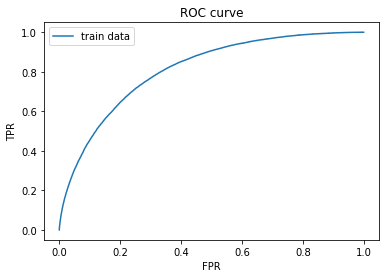

In [75]:

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

y_train_pred=clf_best.predict_proba(train)
print ("train AUC score: ",roc_auc_score(y_train, y_train_pred[:,1]))
fpr_, tpr_, _ = roc_curve(y_train, y_train_pred[:,1])

plt.plot(fpr_, tpr_,label='train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

[[247116  35570]
 [ 12057  12768]]


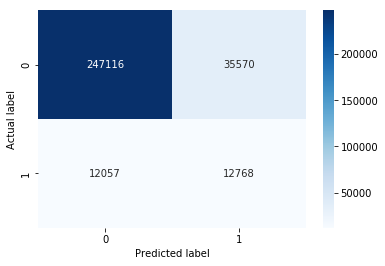

In [76]:
y_pred_ = clf_best.predict(train)
print(confusion_matrix(y_train, y_pred_))
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(confusion_matrix(y_train, y_pred_), annot=True,fmt='d',cmap='Blues')
#sns.heatmap(xticklabels='Actual label', yticklabels='Predicted label')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [77]:
#predicting the probalities for TARGET==1 and adding it into a csv file
final_test_predict=clf_best.predict_proba(application_test_final.drop('SK_ID_CURR',axis=1))[:,1]
final_csv=pd.DataFrame(columns=['SK_ID_CURR','TARGET'])
final_csv['SK_ID_CURR']=application_test_final['SK_ID_CURR']
final_csv['TARGET']=final_test_predict
final_csv.to_csv(os.path.join(root_dir,'final_csv_v3.csv'),index=False)

In [78]:
final_csv.shape

(48744, 2)

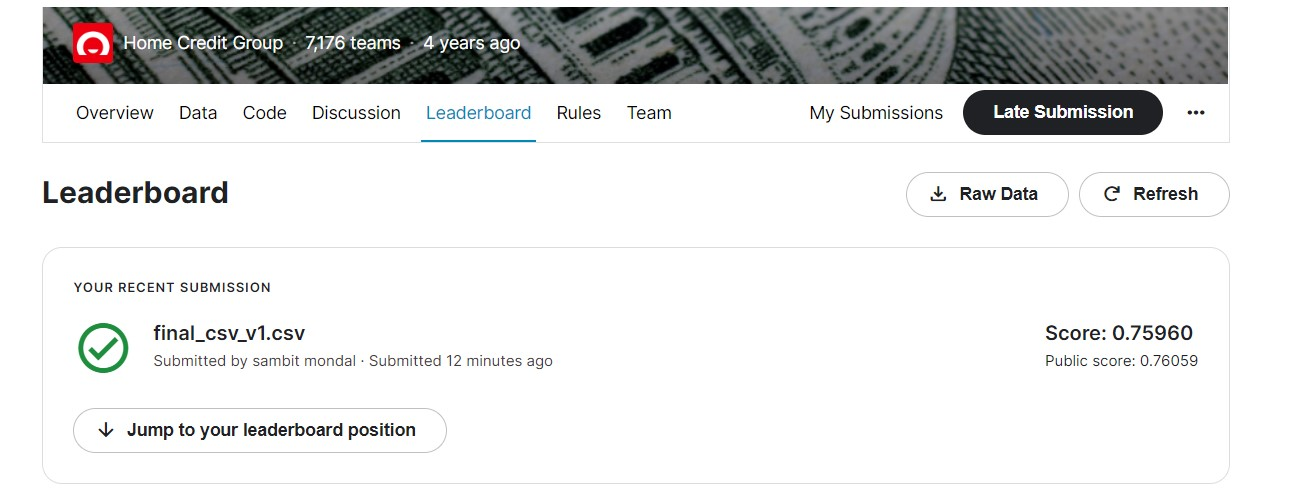

### 11.2. set 2

### 11.2.1. Applying SGD with l2 regularization

In [8]:
#https://stackoverflow.com/questions/60582050/lightgbmerror-do-not-support-special-json-characters-in-feature-name-the-same
application_train_final_set3 = application_train_final_set3.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

#dropping the id column to get final train and test dataset
#replacing nan, infinity values to zero
train=application_train_final_set3.drop('SK_ID_CURR',axis=1)
train.replace([np.inf, -np.inf], np.nan,inplace=True)
train=train.fillna(0)
test=application_test_final_set3.drop('SK_ID_CURR',axis=1)
test.replace([np.inf, -np.inf], np.nan,inplace=True)
test=test.fillna(0)

In [9]:
#standerize values
std_scalar = StandardScaler()

train=std_scalar.fit_transform(train)
test=std_scalar.transform(test)

y_train=application_train['TARGET'].values

In [11]:
params={'alpha':np.logspace(-4,2)}
lr=SGDClassifier(loss='log',n_jobs=-1,penalty='l2',random_state=15)
lr_cv=RandomizedSearchCV(lr,params,cv=3,verbose=100,refit=True,scoring='roc_auc')
lr_cv.fit(train,y_train)
# get the best performing model fit on the whole training set
print("best_model params:", lr_cv.best_estimator_)

results=pd.DataFrame(lr_cv.cv_results_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START alpha=0.00017575106248547912...............................
[CV 1/3; 1/10] END alpha=0.00017575106248547912;, score=0.757 total time= 2.0min
[CV 2/3; 1/10] START alpha=0.00017575106248547912...............................
[CV 2/3; 1/10] END alpha=0.00017575106248547912;, score=0.749 total time= 4.2min
[CV 3/3; 1/10] START alpha=0.00017575106248547912...............................
[CV 3/3; 1/10] END alpha=0.00017575106248547912;, score=0.764 total time= 1.0min
[CV 1/3; 2/10] START alpha=56.89866029018293....................................
[CV 1/3; 2/10] END .....alpha=56.89866029018293;, score=0.708 total time= 1.4min
[CV 2/3; 2/10] START alpha=56.89866029018293....................................
[CV 2/3; 2/10] END .....alpha=56.89866029018293;, score=0.700 total time= 1.3min
[CV 3/3; 2/10] START alpha=56.89866029018293....................................
[CV 3/3; 2/10] END .....alpha=56.89866029018293;

In [13]:
lr_cv.best_estimator_

SGDClassifier(alpha=0.0007196856730011522, loss='log', n_jobs=-1,
              random_state=15)

In [17]:
lr_final=SGDClassifier(loss='log',alpha=0.0007196856730011522,n_jobs=-1,penalty='l2',random_state=15)
lr_final.fit(train,y_train)
sig_clf = CalibratedClassifierCV(lr_final, method='isotonic')
sig_clf.fit(train,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0007196856730011522,
                                                    loss='log', n_jobs=-1,
                                                    random_state=15),
                       method='isotonic')

train AUC score:  0.781392374056614


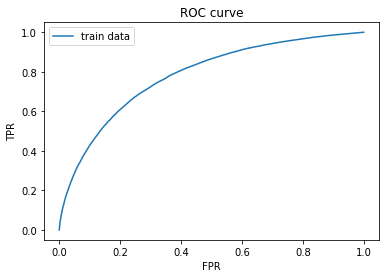

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

y_train_pred=sig_clf.predict_proba(train)
print ("train AUC score: ",roc_auc_score(y_train, y_train_pred[:,1]))
fpr_, tpr_, _ = roc_curve(y_train, y_train_pred[:,1])

plt.plot(fpr_, tpr_,label='train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

[[282244    442]
 [ 24154    671]]


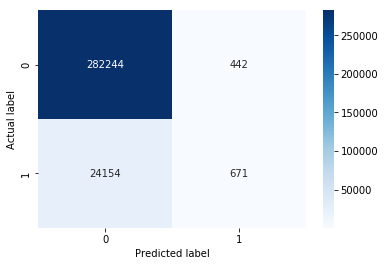

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_ = sig_clf.predict(train)
print(confusion_matrix(y_train, y_pred_))
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(confusion_matrix(y_train, y_pred_), annot=True,fmt='d',cmap='Blues')
#sns.heatmap(xticklabels='Actual label', yticklabels='Predicted label')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [21]:
final_test_predict=sig_clf.predict_proba(test)[:,1]
final_csv=pd.DataFrame(columns=['SK_ID_CURR','TARGET'])
final_csv['SK_ID_CURR']=application_test_final_set3['SK_ID_CURR']
final_csv['TARGET']=final_test_predict
final_csv.to_csv(os.path.join(root_dir,'final_csv_v5.csv'),index=False)

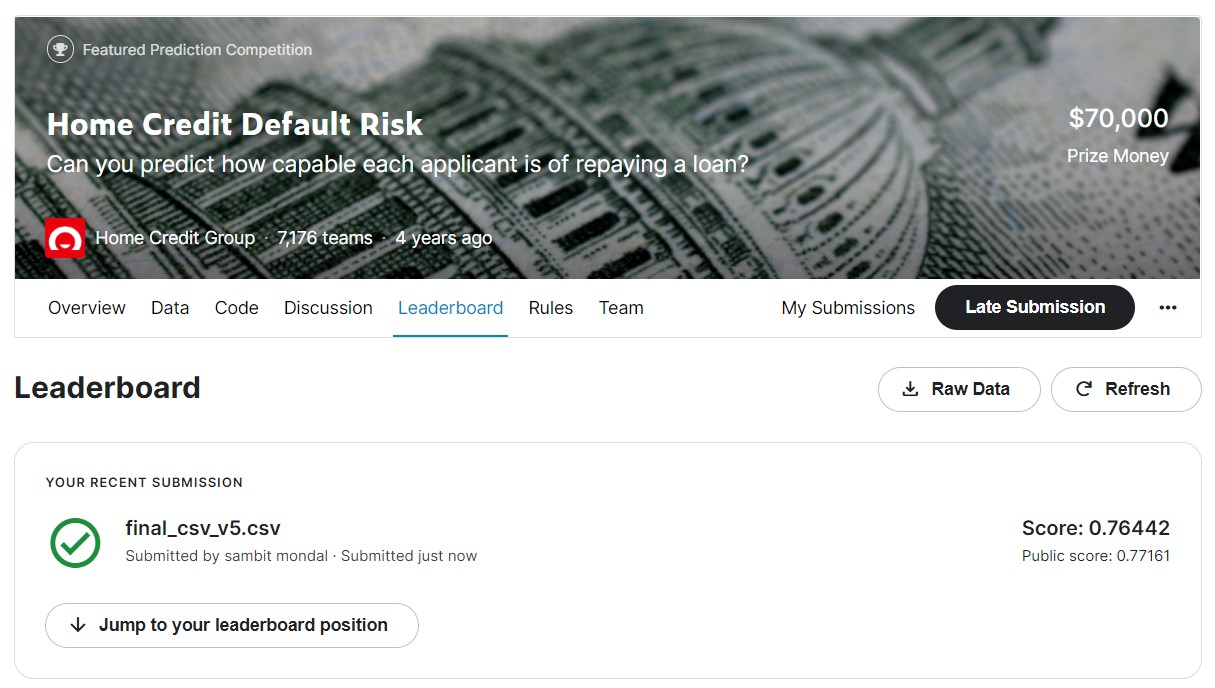

### 11.2.1. Applying Light GBM

In [34]:
#https://stackoverflow.com/questions/60582050/lightgbmerror-do-not-support-special-json-characters-in-feature-name-the-same
import re

application_train_final_set3 = application_train_final_set3.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [35]:
#dropping the id column to get final train and validation dataset
train=application_train_final_set3.drop('SK_ID_CURR',axis=1).values

In [36]:
train.shape

(307511, 1375)

In [37]:
y_train.shape

(307511,)

In [ ]:

clf1 = lgb.LGBMClassifier(max_depth=-1, random_state=30, silent=True, metric='None', n_jobs=-1)
# define search space
param_test ={'num_leaves': sp_randint(6, 30), 
         'min_child_samples': sp_randint(100, 500), 
         'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
         'subsample': sp_uniform(loc=0.2, scale=0.8), 
         'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
         'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
         'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
         'scale_pos_weight':[1,2,6,12],
         'n_estimators':[10,100,300,500,1000,5000]}

clf_cv1=RandomizedSearchCV(
estimator=clf1, param_distributions=param_test, 
scoring='roc_auc',
n_iter=10,
cv=7,
refit=True,
random_state=30,
verbose=True)


clf_cv1.fit(train, y_train)
# get the best performing model fit on the whole training set
print("best_model params:", clf_cv1.best_estimator_)

results1=pd.DataFrame(clf_cv1.cv_results_)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


In [110]:
results1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     303.065367     30.419555         1.267140        0.211376   
1     235.963415     80.435118         0.859600        0.601834   
2     395.465942     39.500197         1.599334        0.520448   
3     267.941144     88.595313         1.601463        0.739332   
4     290.950156    105.366695         1.548587        0.456455   
5     242.319408     54.293329         1.932551        0.526504   
6     224.693590     83.431761         2.849389        1.550244   
7     252.856973     76.616461         1.486428        0.524810   
8     268.622887     73.816816         1.710333        0.629094   
9     289.985641     48.875660         1.817161        1.448102   

  param_colsample_bytree param_min_child_samples param_min_child_weight  \
0               0.786486                     401                      1   
1               0.995051                     363                   1000   
2               0.984583                     490                  1e-05   
3               0.840972                     213                  10000   
4               0.632357                     378                  10000   
5               0.557676                     447                    0.1   
6               0.624336                     269                  10000   
7               0.870792                     483                  0.001   
8               0.428699                     346                   1000   
9                0.59442                     471                    100   

  param_n_estimators param_num_leaves param_reg_alpha       ...         \
0               1000               29               1       ...          
1                100               23               2       ...          
2                500               21              50       ...          
3                500               19               7       ...          
4                100               28               0       ...          
5                100               26               1       ...          
6                 10               13             0.1       ...          
7                300               15              50       ...          
8                500               18               2       ...          
9                300               16               2       ...          

  split0_test_score split1_test_score split2_test_score split3_test_score  \
0          0.784787          0.787574          0.792106          0.786672   
1          0.791274          0.790425          0.793371          0.789078   
2          0.794247          0.794062          0.798205          0.792594   
3          0.775030          0.772056          0.776791          0.769616   
4          0.763016          0.760874          0.765479          0.759197   
5          0.791605          0.789948          0.793009          0.788524   
6          0.751662          0.752018          0.752941          0.751188   
7          0.792153          0.791606          0.795911          0.790835   
8          0.793049          0.792673          0.796769          0.792443   
9          0.792396          0.791116          0.796034          0.789669   

   split4_test_score  split5_test_score  split6_test_score  mean_test_score  \
0           0.789149           0.789262           0.789555         0.788443   
1           0.790727           0.794148           0.790285         0.791330   
2           0.795409           0.797835           0.795022         0.795339   
3           0.771675           0.778887           0.774717         0.774110   
4           0.759844           0.768411           0.765735         0.763222   
5           0.788142           0.793204           0.788848         0.790469   
6           0.747677           0.760289           0.756790         0.753223   
7           0.792809           0.795897           0.792677         0.793127   
8           0.794277           0.797838           0.794363       

In [111]:
clf_cv1.best_estimator_

LGBMClassifier(colsample_bytree=0.9845830012866338, metric='None',
               min_child_samples=490, min_child_weight=1e-05, n_estimators=500,
               num_leaves=21, random_state=30, reg_alpha=50, reg_lambda=10,
               scale_pos_weight=2, silent=True, subsample=0.7032798646617617)

In [38]:
clf_best1 = lgb.LGBMClassifier(max_depth=-1, random_state=30, silent=True, n_jobs=-1,\
                              colsample_bytree=0.9845830012866338, metric='None',\
                              min_child_samples=490, min_child_weight=1e-05, n_estimators=500,\
                              num_leaves=21, reg_alpha=50, reg_lambda=10,\
                              scale_pos_weight=2, subsample=0.7032798646617617)
clf_best1.fit(train,y_train)

LGBMClassifier(colsample_bytree=0.9845830012866338, metric='None',
               min_child_samples=490, min_child_weight=1e-05, n_estimators=500,
               num_leaves=21, random_state=30, reg_alpha=50, reg_lambda=10,
               scale_pos_weight=2, silent=True, subsample=0.7032798646617617)

train AUC score:  0.8547536239523149


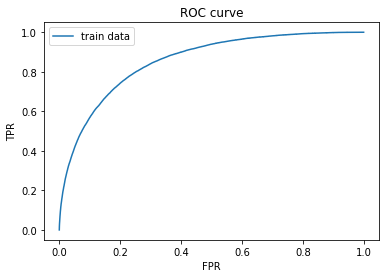

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

y_train_pred=clf_best1.predict_proba(train)
print ("train AUC score: ",roc_auc_score(y_train, y_train_pred[:,1]))
fpr_, tpr_, _ = roc_curve(y_train, y_train_pred[:,1])

plt.plot(fpr_, tpr_,label='train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

[[278171   4515]
 [ 19193   5632]]


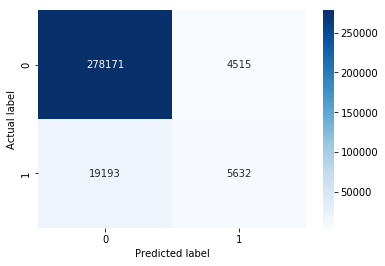

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_ = clf_best1.predict(train)
print(confusion_matrix(y_train, y_pred_))
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(confusion_matrix(y_train, y_pred_), annot=True,fmt='d',cmap='Blues')
#sns.heatmap(xticklabels='Actual label', yticklabels='Predicted label')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [41]:
final_test_predict=clf_best1.predict_proba(application_test_final_set3.drop('SK_ID_CURR',axis=1))[:,1]
final_csv=pd.DataFrame(columns=['SK_ID_CURR','TARGET'])
final_csv['SK_ID_CURR']=application_test_final_set3['SK_ID_CURR']
final_csv['TARGET']=final_test_predict
final_csv.to_csv(os.path.join(root_dir,'final_csv_20220422.csv'),index=False)

In [59]:
final_csv.shape

(48744, 2)

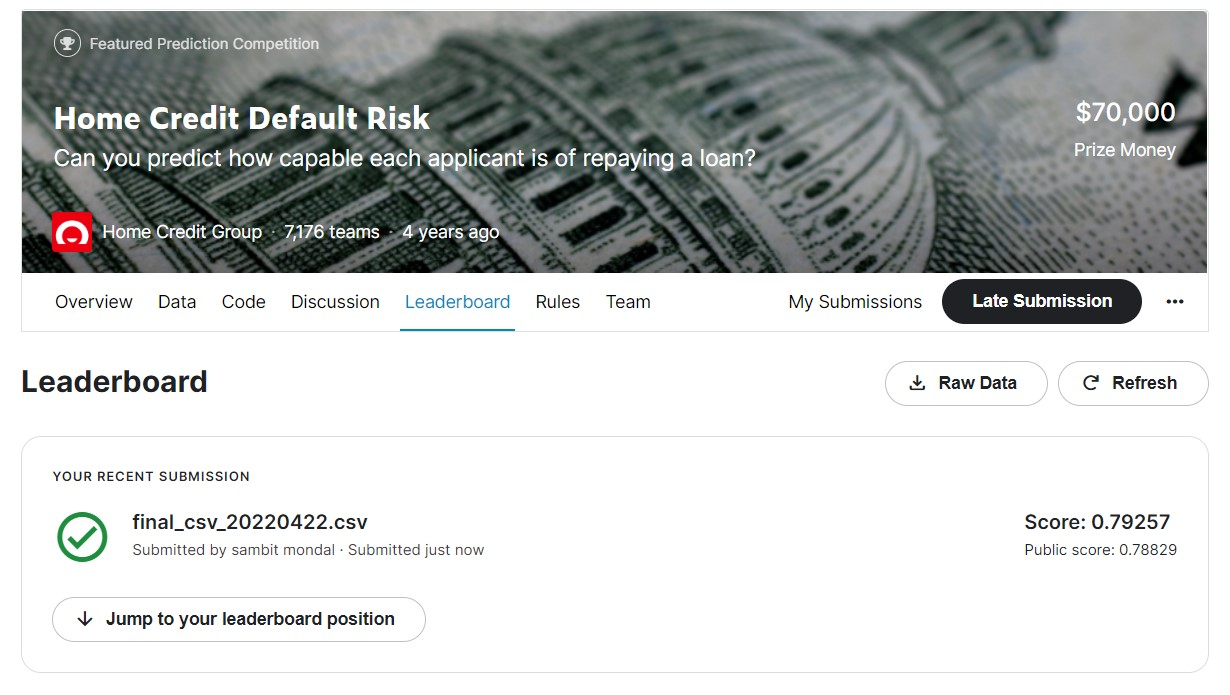